## Prepare system

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import scipy.linalg
from itertools import *
from random import *
import seaborn as sns
from shapely import *
from shapely.geometry import *
from descartes.patch import PolygonPatch
#import ternary
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
import math
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rcParams

## Set paths

In [3]:
project_path="/content/drive/My Drive/SYNC_Projects/Plasmidia/ms/"   ####  <-------------------- check
projectDIR="/content/drive/MyDrive/SYNC_Projects/Plasmidia/ms/" 

dfs_path=project_path+"data/experimental_dataframes/"

figuresDir=projectDIR+"figures/"
figures_path=project_path+"figures/"
table_path=project_path+"data/parameters/"
table_nature=project_path+"data/plasmidsInNature_tables/"
data_path=table_path
dfs_path=project_path+"data/experimental_dataframes/"
code_path=project_path+"code/"
sims_path=projectDIR+"data/Random_sims/"
randomEnvs=projectDIR+"data/Random_envs/"

sys.path.insert(0, code_path)


## Importing model and parameters

In [4]:
from params import *
from model import *
from plotting import *
from randomFunctions import *

,Amp,κ_n,⍺
0,0.0,0.272276,0.000000
1,1.0,0.272276,-0.377810
2,2.0,0.272276,-0.332662
3,2.5,0.272276,-0.058457
4,3.0,0.272276,0.992911
5,3.5,0.272276,0.980100
6,4.0,0.272276,0.992075
7,6.0,0.272276,0.993730


,Parameter,Measured value,Formula,Estimated value,Description
0,r,0.435435,NaN,NaN,plasmid strain growth rate
1,ρ,0.052335,NaN,NaN,WT growth rate advantage
2,σ,6.074090,NaN,NaN,exponential phase duration
3,μ_n,NaN,μ_n1-( ((r*2^-n)+ρ)/( (r*2^-n)*exp((r*2^-n+ρ)*...,0.000006,1-day fraction of segregants
4,κ_n,NaN,κ_n=(ρ*(1-exp(-(r*2^-n+ρ)*σ)) )/(ρ+r*2^-n),0.272314,fitness cost
5,n,19.000000,NaN,NaN,plasmid copy number


Number of plasmids 19
kappaN 0.272276
alphas [0.0, -0.37781, -0.332662, -0.058457, 0.992911, 0.9801, 0.992075, 0.99373]
r:  0.4354352275
ρ: 0.0523347955
ρN: 0.002754462921052632
σ 6.07408961666667
Cost per plasmid: 0.014330315789473686


# Figure 1

## A

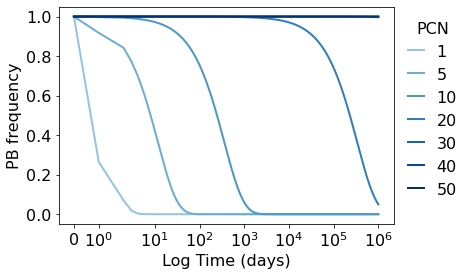

In [5]:
n =NpBGT
cc = kappaN/NpBGT
c = cc*n
a = 0.99
x0 = 0.999
x0=1.0
Tmax = 1000000
T = 0


ns=[1,5,10,20,30,40,50]
colors = plt.cm.Blues(np.linspace(0,1,len(ns)+4))
Time = np.linspace(0, Tmax, Tmax+1)

#fig=plt.figure(figsize=(10,5))
fig1A=plt.figure(figsize=(6,4))
fig1A.set_facecolor('white')
plt.rcParams.update({'font.size': 16})

for ni, n in enumerate(ns):
    c = 0.
    X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
    plt.plot(Time, X, linewidth = 2.0, label = str(n), color=colors[ni+4])
    #plt.semilogx(Time, X, linewidth = 2.0, label = "n=" + str(n), color=colors[ni+4])

plt.ylim([-0.05,1.05])
plt.xscale("symlog")
plt.xlabel('Log Time (days)')#,fontsize=20)
plt.ylabel('PB frequency')#,fontsize=20)

plt.legend(title='PCN',bbox_to_anchor=(1., 1), loc='upper left',framealpha=0.0,handlelength=1)
plt.rcParams.update({'font.size': 16})
figname=figuresDir+"Fig-1_A.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-1_A.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()


## B

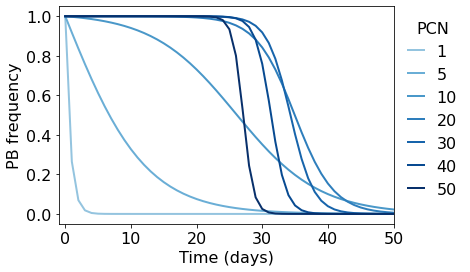

In [6]:
cc =kappaN/NpBGT
cc=pBGT_cost
a = 0.99
x0 =1.0

Tmax = 50
T=0
Time = np.linspace(0, Tmax, Tmax+1)

ns=[1,5,10,20,30,40,50]
fig1B=plt.figure(figsize=(6,4))

colors = plt.cm.Blues(np.linspace(0,1,len(ns)+4))
for ni, n in enumerate(ns):
    c = cc*n
    if(c>=1):
        continue
    X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
    
    plt.plot(Time, X, linewidth = 2.0, label = "" + str(n), color=colors[ni+4])

plt.rcParams.update({'font.size': 16})

plt.ylim([-0.05,1.05])
plt.xlim([-1,Tmax])
plt.xlabel('Time (days)')#,fontsize=20)
plt.ylabel('PB frequency')#,fontsize=20)
plt.legend(title='PCN',bbox_to_anchor=(1., 1), loc='upper left',framealpha=0.0,handlelength=1)

figname=figuresDir+"Fig-1_B.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-1_B.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


## C

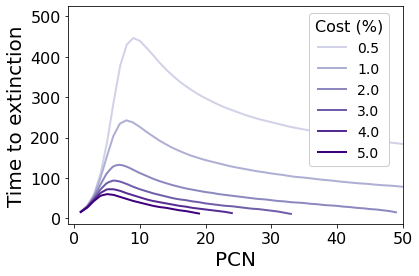

In [7]:
n =NpBGT
x0 =1.0
Tmax = 500

T=0
Time = np.linspace(0, Tmax, Tmax+1)
ns=np.linspace(1,100,100)
ns=[int(x) for x in ns]
tex=[]
nsx=[]

fig1C=plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 16})
fig1C.set_facecolor('white')
ccs=[0.005, 0.01, 0.02, 0.03, 0.04, 0.05] #np.linspace(0.005,.05,6)
colors = plt.cm.Purples(np.linspace(0,1,len(ccs)+2))
for ic, cc in enumerate(ccs):
    tex=[]
    nsx=[]
    for n in ns:
        c = cc*n
        if(c>=1):
            continue
        X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
        
        indx=-1
        indxs=[xi for xi,x in enumerate(X) if x<1e-9]      ##threshold from expreriments population size
        if indxs!=[]:
            indx=indxs[0]
        v=Time[indx]
        tex.append(v)
        nsx.append(n)


    xs=np.linspace(nsx[0],nsx[-1],100)
    ys=np.interp(xs, nsx, tex)    
    plt.plot(xs, ys, '-', linewidth = 2.0, label=round(100*cc,1), color=colors[ic+2])

plt.xlim([-1,50])
plt.xlabel('PCN',fontsize=20)
plt.ylabel('Time to extinction',fontsize=20)
plt.legend(title='Cost (%)', bbox_to_anchor=(.7, 1), loc='upper left',framealpha=1.0,fontsize=14)

plt.rcParams.update({'font.size': 16})
figname=figuresDir+"Fig-1_C.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-1_C.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


## D

In [8]:
ns1=np.linspace(0,20,11)
ns2=np.linspace(30,50,3)
ys=np.concatenate((ns1,ns2),axis=0)
ys[0]=1
xs=np.linspace(0,.05,21)

ymax=100 #pcns
xmax=0.05 #costs

x0 =1.0  
Tmax = 1000
pcns_sim=ys
print(pcns_sim)

### costs per plasmid
costs_sim=xs
print(costs_sim)

ts_toloss=[]
alphas_list=[]
pcn_list=[]
costs_list=[]
seasons_list=[]
areas=[]
Time = np.linspace(0, Tmax, Tmax+1)


T=0
a=0.
for ni,n in enumerate(pcns_sim):
    for ci,cc in enumerate(costs_sim):
        c=cc*n
        if(c>=1):
            ts_toloss.append(np.nan)
            areas.append(np.nan)
            alphas_list.append(a)
            pcn_list.append(n)
            costs_list.append(cc)
            seasons_list.append(T)
            continue
    
        X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
        indx=-1
        indxs=[xi for xi,x in enumerate(X) if x<1e-11]      
        if indxs!=[]:
            indx=indxs[0]
        coords=[(t,y) for t,y in zip(Time,X)]
        coords.append((Time[-1],0))
        coords.append((0,0))
        poly=Polygon(coords)
        areaPCN=poly.area
        areas.append(areaPCN)
        ts_toloss.append(Time[indx])
        alphas_list.append(a)
        pcn_list.append(n)
        costs_list.append(cc)
        seasons_list.append(T)
        

[ 1.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 30. 40. 50.]
[0.     0.0025 0.005  0.0075 0.01   0.0125 0.015  0.0175 0.02   0.0225
 0.025  0.0275 0.03   0.0325 0.035  0.0375 0.04   0.0425 0.045  0.0475
 0.05  ]


-0.06826620663840333 2.9999999999992024


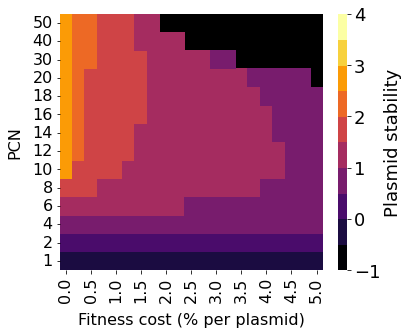

In [9]:

def plot_matrix(df2di,xs,ys,title,cmapi,cbarlabel,plot_variables,vmini,vmaxi):
    cb_kwargs = {"shrink" : 1,
    "orientation" : "vertical",
    "fraction" : 0.1,
    "pad" : 0.05,
    "aspect" : 30,
    'label': cbarlabel
    }
    fsize=18
    
    fig, ax1=plt.subplots(figsize=(6,5)) #10,8
    fig.set_facecolor('white')
    plt.rcParams.update({'font.size': fsize})
  
    cmapx = matplotlib.cm.get_cmap(cmapi)
    this_range=np.linspace(0,1,10)    
    myColors=  cmapx(this_range)
    
    cmapi = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    ax=sns.heatmap(df2di,cmap=cmapi,vmin=vmini,vmax=vmaxi,cbar_kws=cb_kwargs, ax=ax1)  
    ax.invert_yaxis()
    
    ax.set_facecolor('xkcd:black')    # set 
    ax1.set_xticklabels(['{:1.1f}'.format(float(t.get_text())*100) for t in ax1.get_xticklabels()])#,fontsize=12)
    ax.set_yticklabels(np.round(np.asarray(ys)),rotation='0' )
    
    plt.xlabel(plot_variables[0],labelpad=10)
    plt.ylabel(plot_variables[1],labelpad=10)
    
    return fig



log=True
#log=False
areasp=areas
if(log):
    areasp=[np.log10(x) for x in areas]

multi_sim_df=pd.DataFrame({"PCN":pcn_list,"Alphas":alphas_list,"Cost":costs_list,"Season":seasons_list,"Extinction":ts_toloss,"AUC":areasp})

title="Antibiotic free plasmid stability"
plot_variables=["PCN","Cost"]
fixed_variables=["Season","Alphas"]
fixed_values=[0.0,0.0]

mtx=generate_matrix_data(multi_sim_df,xs,ys,fixed_variables,fixed_values,plot_variables,zval="AUC")
df2d=pd.DataFrame(mtx,index=ys,columns=xs)


vmin=min(df2d.min(axis = 1 )) 
vmax=max(df2d.max(axis = 1, skipna = True)) 
print(vmin,vmax)
if log:
    vmin=int(vmin-1)
    vmax=int(vmax+2)

cmap="inferno"

xsdf=df2d.columns
ysdf=[int(x) for x in df2d.index]
cbarlabel="Plasmid stability"#r"AUC (log$_{10}$ scale)"
plot_variables=["Fitness cost (% per plasmid)","PCN"]

fig1D=plot_matrix(df2d,xsdf,ysdf,title,cmap,cbarlabel,plot_variables,vmin,vmax)
plt.tight_layout()

figname=figuresDir+"Fig-1_D.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-1_D.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


# Figure 2

## A-G

0.2722803217066464


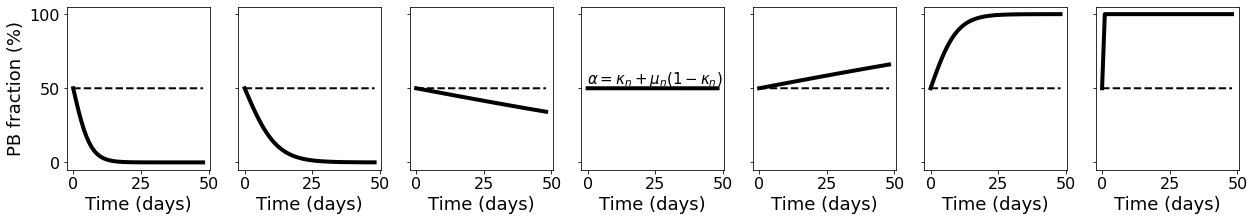

In [32]:
n =NpBGT
kappaN
cc = kappaN/NpBGT
cc=pBGT_cost

Tmax =48
T= 1   
alphastar=float(alpha_star(NpBGT))
print(alphastar)
this_alphas=[0,0.2,alphastar-0.01,alphastar+0.01,0.6,1]
this_alphas=[0,alphastar*.5,alphastar-0.01,alphastar,alphastar+0.01,alphastar*1.5,1]


fig,axs=plt.subplots(1,len(this_alphas),figsize=(3*len(this_alphas),3),sharey=True)
fig.set_facecolor('white')
Time = np.linspace(0, Tmax, Tmax+1)
colors = plt.cm.coolwarm(np.linspace(0,1,len(this_alphas)+2))

x0=.5

Xk = solutionPlasmidsPeaks(x0, n, cc*n, Tmax, T, kappaN)
#l='\kappa_n='+l
this_color='k'    
for ai2,a2 in enumerate(this_alphas): #In every plot
    axs[ai2].plot(Time, Xk, '--',linewidth = 2.0,c=this_color, label = r"$\alpha=%s$")

axs[3].text(50, 0.5, r"$\alpha=\kappa_n + \mu_n(1-\kappa_n)$" , fontsize=15, horizontalalignment='right',verticalalignment='bottom')

for ai,a in enumerate(this_alphas):
    
    X = solutionPlasmidsPeaks(x0, n, cc*n, Tmax, T, a)
    l=str(round(a,2))
    this_color=colors[ai+1]
    axs[ai].plot(Time, X, linewidth = 4.0,c='k', label = r"$\alpha=%s$")

    axs[ai].set_ylim([-0.05,1.05])
    axs[ai].set_yticks([0,.5,1])
    axs[ai].set_yticklabels([0,50,100])
    axs[ai].set_xticks([0,25,50])
    axs[ai].set_xlabel('Time (days)',fontsize=18)
    if ai==0:
        axs[ai].set_ylabel('PB fraction (%)',fontsize=18)
 
plt.rcParams.update({'font.size': 16})
figname=figuresDir+"Fig-2_A-G.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-2_A-G.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()



## H

In [13]:
n =NpBGT
cc =kappaN/NpBGT
x0 = 0.5

Tmax =100000
T= 1   

ns=np.linspace(1,50,50)
f2h_ns=[int(x) for x in ns]
print("ns=",ns)

f2h_ccs=np.linspace(0,.05,6)
print("ccs=",ccs)

f2h_talphas=np.linspace(0,1,101)
print("alphas=",f2h_talphas)

#print(xxxx)
f2h_nsx_all=[]
f2h_op_alpha_all=[]
for cc in f2h_ccs:
    cc=round(cc,4)
    print("\n cost:",cc,end=" - ")
    nsx=[]
    op_alpha=[]
    for n in f2h_ns:        
        c = cc*n
        c=round(c,4)
        print(c,end=",")
        if(c>=1):
            #print(n,"max PCN")
            continue    
        for a in f2h_talphas:          
            X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
                
            if X[-1]>1e-100:
                op_alpha.append(a)
                nsx.append(n)
                break
    
    f2h_nsx_all.append(nsx)
    f2h_op_alpha_all.append(op_alpha)



ns= [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
ccs= [0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
alphas= [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]

 cost: 0.0 - 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
 cost: 0.01 


cost: 0.0 - 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
cost: 0.01 - 0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,
cost: 0.02 - 0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98,1.0,
cost: 0.03 - 0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.51,0.54,0.57,0.6,0.63,0.66,0.69,0.72,0.75,0.78,0.81,0.84,0.87,0.9,0.93,0.96,0.99,1.02,1.05,1.08,1.11,1.14,1.17,1.2,1.23,1.26,1.29,1.32,1.35,1.38,1.41,1.44,1.47,1.5,
cost: 0.04 - 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Use the colorbar set_ticks() method instead.


Saving  /content/drive/MyDrive/SYNC_Projects/Plasmidia/ms/figures/Fig-2_H.png


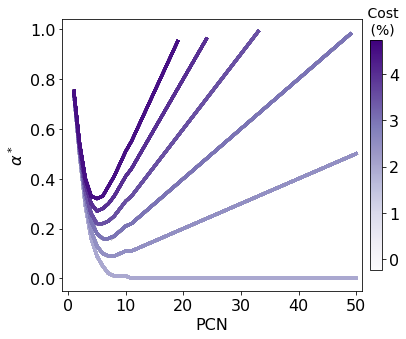

In [14]:

figf2h=plt.figure(figsize=(6,5))
figf2h.set_facecolor('white')
plt.rcParams.update({'font.size': 16})

norm = matplotlib.colors.Normalize(vmin=np.min(ccs)-.05,vmax=np.max(ccs)+.005)

# choose a colormap
#c_m = matplotlib.cm.cool
c_m = matplotlib.cm.Purples
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

for cci, cc in enumerate(f2h_ccs):
    cc=round(cc,4)
    print("\ncost:",cc,end=" - ")
    nsx=f2h_nsx_all[cci]
    op_alpha=f2h_op_alpha_all[cci]

    for ni, n in enumerate(ns):        
        c = cc*n
        c=round(c,4)
        print(c,end=",")
        if(c>=1):
            #print(n,"max PCN")
            continue   

        if(len(nsx)>0):
            plt.plot(nsx,op_alpha, linewidth =3.0, color=s_m.to_rgba(cc))#,alpha=.5)

cbar=plt.colorbar(s_m,shrink=.85,fraction=.1,pad=.025)
cbar.ax.set_title("   Cost\n   (%)",size=14)
cbar.ax.set_yticks([0.0, .01, .02, .03, .04, .05, 0.06])
cbar.ax.set_yticklabels([0, 1, 2, 3, 4, 5, 6])

plt.xlim([-1,ns[-1]+1])
plt.xlabel('PCN')#,fontsize=20)
plt.ylabel(r'$\alpha^*$')#,fontsize=20)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
figname=figuresDir+"Fig-2_H.pdf"
print("Saving ",figname)
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-2_H.png"
print("Saving ",figname)
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()


## I

In [15]:
n =NpBGT
cc =kappaN/NpBGT
x0 =0.5

Tlim_exp=7

T= 1   
f2i_ns=[5,NpBGT,30]
f2i_talphas=np.linspace(0,1,1001)

f2i_t_ex_n=[]
f2i_t_fix_n=[]
f2i_t_co_n=[]

for ni,this_n in enumerate(f2i_ns):
    print(this_n)
    c = cc*this_n
    if(c>=1):
        print(n,"max PCN")
        continue
    t_ex=[]
    t_fix=[]
    t_co=[]
    for a in f2i_talphas:    
        a=round(a,3)
        print(".",end="")
        Tmax_exp=1
        indxs=[]
        while(indxs==[]):
            Tmaxi=10**Tmax_exp
            Time = np.linspace(0, Tmaxi, Tmaxi+1)
            X = solutionPlasmidsPeaks(x0, this_n, c, Tmaxi, T, a)
            
            indxs=get_first_rep(X)
            Tmax_exp=Tmax_exp+1
            
            if(Tmax_exp>Tlim_exp):
                indxs=[Tmaxi]
                #print("longer than 1e6",(c,a))
                break
        
        indx=indxs[0]
        v=Time[indx]
        
        ve=np.nan
        vf=np.nan
        vt=np.nan
        
        if(X[-1]>1-5e-3):
            vf=v
        elif(X[-1]<1e-100):
            ve=v
        elif((abs(X[int(Tmaxi*.9)]-X[Tmaxi])<1e-10) & (np.isnan(vf)) & (np.isnan(ve))):
            vt=v
        else:
            print("None",n,a,c,X[Tmaxi],vf,ve,abs(X[int(Tmaxi*.9)]-X[Tmaxi]),vt)
        t_ex.append(ve)
        t_fix.append(vf)
        t_co.append(vt)
    print()

    f2i_t_ex_n.append(t_ex)
    f2i_t_fix_n.append(t_fix)
    f2i_t_co_n.append(t_co)

5
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

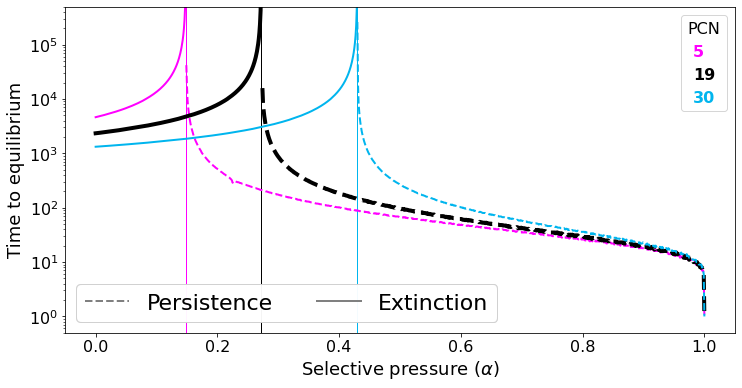

In [16]:

fig2i=plt.figure(figsize=(12,6))
fig2i.set_facecolor('white')
n =NpBGT
cc =kappaN/NpBGT
f2i_ns=[5,NpBGT,30]
f2i_talphas=np.linspace(0,1,1001)
colors = plt.cm.cool(np.linspace(0,1,len(f2i_ns)))

for ni,this_n in enumerate(f2i_ns):
    c = cc*this_n
    t_ex=f2i_t_ex_n[ni]
    t_fix=f2i_t_fix_n[ni]
    t_co=f2i_t_co_n[ni]
    if this_n==n:
        tcol='k'
        lw=4.0
    elif this_n<n:
        tcol=colors[-1]
        lw=2.0
    else:
        tcol='#00B5EE'
        lw=2.0
    astar=alpha_star(this_n)
    
    plt.plot(f2i_talphas,t_fix, linewidth =lw,linestyle="dashed", color=tcol,zorder=2)
    plt.plot(f2i_talphas,t_co, linewidth =lw,linestyle="dashed", color=tcol,zorder=2)
    plt.plot(f2i_talphas,t_ex, linewidth =lw, color=tcol,zorder=2)
    plt.vlines(x=astar,ymin=0,ymax=5e6,color=tcol,zorder=1,linewidth=1)#,linestyle="dotted")


lines = plt.gca().get_lines()
chleg=[1,3,6]
legendx = plt.legend([lines[i] for i in chleg],['%s'%f2i_ns[0],'%s'%f2i_ns[1],'%s'%f2i_ns[2],], loc='upper right',title="PCN",
                     handlelength=0, handletextpad=0,fancybox=True)#,title_fontsize='medium')#,frameon=False) #9
for line, text in zip(legendx.get_lines(), legendx.get_texts()):
    text.set_color(line.get_color())
    text.set_alpha(2)
    text.set_fontweight(800)
for item in legendx.legendHandles:
    item.set_visible(False)
plt.gca().add_artist(legendx)

chleg=[len(lines)-2,len(lines)-1]
legend2 = plt.legend([lines[i] for i in chleg],['Persistence','Extinction'], loc='lower left', ncol=2,fontsize=22) 
for line in legend2.get_lines():
    line.set_color('gray')
plt.gca().add_artist(legend2)


plt.yscale("log")
plt.xlim([-0.05,1.05])
plt.ylim([0.5,5e5])
plt.xlabel(r'Selective pressure ($\alpha$)',fontsize=18)
plt.ylabel('Time to equilibrium',fontsize=18)

plt.rcParams.update({'font.size': 16})
figname=figuresDir+"Fig-2_I.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-2_I.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()



# Figure 3

In [17]:
reps=["rep-1","rep-2","rep-3","rep-4"]
hours=["16h","24h"]      

freqs=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 'x']
cols=[x for x in np.arange(1,13)]

freqs_dict=dict(zip(cols,freqs))

print(freqs_dict)
rows="A B C D E F G H"
rows=rows.split()
amps=[0,1,2,2.5,3,3.5,4,6]
amp_dict=dict(zip(rows,amps))

print(amp_dict)


{1: 0, 2: 0.1, 3: 0.2, 4: 0.3, 5: 0.4, 6: 0.5, 7: 0.6, 8: 0.7, 9: 0.8, 10: 0.9, 11: 1, 12: 'x'}
{'A': 0, 'B': 1, 'C': 2, 'D': 2.5, 'E': 3, 'F': 3.5, 'G': 4, 'H': 6}


In [18]:
file=dfs_path+"ratioLocalDbg.csv"
df_ratioLocalDbg=pd.read_csv(file,sep=",",index_col=0)

file=dfs_path+"ONratioLocalDbg.csv"
df_ONratioLocalDbg=pd.read_csv(file,sep=",",index_col=0)

file=dfs_path+"ratioLocal.csv"
df_ratioLocal=pd.read_csv(file,sep=",",index_col=0)

file=dfs_path+"ratio.csv"
df_ratio=pd.read_csv(file,sep=",",index_col=0)

file=dfs_path+"odDbg.csv"
df_odDbg=pd.read_csv(file,sep=",",index_col=0)

file=dfs_path+"GfpDbg.csv"
df_gfpDbg=pd.read_csv(file,sep=",",index_col=0)

## Inoculum normalization

In [19]:

freqs=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
cols=[x for x in np.arange(1,12)]
freqs_dict=dict(zip(cols,freqs))

this_df=df_ONratioLocalDbg.copy()
#this_df=df_ONgfpDbg.copy()
#this_df=df_ONratioLocal.copy()

df_ONiniFreqs=this_df.copy()

mtxON=[]
gammasON=[]
on_points=[]
for ri,r in enumerate(amp_dict.keys()):
    amp=amp_dict[r]
    ys_mtx=[]
    freqs=[]
    ys=[]
    for ci,c in enumerate(freqs_dict.keys()):
        freq=freqs_dict[c]
        freqs.append(freq)
        this_key=r+str(c)
        val=this_df[this_key][0]
        on_points.append((freq,val))

        ys.append(val)
    ys_mtx.append(ys)
   
    y_min=ys[0]
    
    y_max=ys[-1]
    
    ys2=(ys-y_min)/(y_max-y_min)
           
    mtxON.append(ys2)
    #print(amp,freqs,ys2)
    for ci,c in enumerate(freqs_dict.keys()):
        this_key=r+str(c)
        val=ys2[ci]
        df_ONiniFreqs[this_key]=val
    
    
    freqsnp=np.asarray(freqs)
    
    popt, pcov = curve_fit(f0, freqs, ys2,bounds=([0,mu_n*0.9999],[1,mu_n*1.0001]))
    #print(popt)
    gammaON=popt[0]
    #print(gammaON)
    gammasON.append(gammaON)    
    

[0.0, 0.09876001938634754, 0.1918502777467099, 0.26879916489579836, 0.38356783357566265, 0.46740633038809976, 0.5663363531297767, 0.7059836707303434, 0.6879245423703538, 0.874759721134847, 0.973404913693472, 0.0, 0.09988890131603474, 0.19326548111695188, 0.28455877418633263, 0.37842299519069456, 0.47412891921112477, 0.560580099168624, 0.7022823696081721, 0.7854005890467136, 0.7487439883681914, 0.9555456138388696, 0.0, 0.09762517242664877, 0.19042165305894196, 0.2885642918390933, 0.3793788912500466, 0.46775230212877006, 0.5899116429929538, 0.7050695298810722, 0.7965999328934124, 0.8962189166014242, 1.0020803042165305, 0.0, 0.10011408119897103, 0.195378592998546, 0.28965141855869964, 0.38540804533422807, 0.4746538418521418, 0.5971472243969728, 0.6986049286060471, 0.7922514260149871, 0.8729612645863625, 1.015668642582858, 0.0, 0.10027811952428886, 0.19446594340677775, 0.288595608246654, 0.38018417030160684, 0.47288968422622374, 0.5876658091936025, 0.7043865339447489, 0.7986668157924169, 0

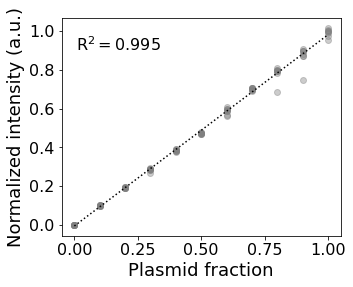

In [20]:
fig=plt.figure(figsize=(5,4))
plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')


xs=[]
ys=[]
ymax=on_points[-1][-1]
for p in on_points:
    x=p[0]
    y=p[1]
    ynorm=np.divide(y,ymax)
    xs.append(x)
    ys.append(ynorm)
    plt.scatter(x,ynorm,color='gray', alpha=0.4)
    plt.xlabel('Plasmid fraction',fontsize=18)
    plt.ylabel('Normalized intensity (a.u.)',fontsize=18)


xs=np.array(xs).reshape((-1, 1))
model = LinearRegression().fit(xs, ys)

print(ys)
#plt.plot(xs, ys,':k')

r_sq = model.score(xs, ys)

plt.annotate(r"R$^2=$%s"%round(r_sq,3),xy=(.05,.85),xycoords="axes fraction")#,bbox=dict(boxstyle="round",fc="white",  ec="gray", lw=2))
print(r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

plt.plot(freqs, model.coef_*freqs + model.intercept_, ':k')

figName=figures_path+"Fig-3_A.pdf"
plt.savefig(figName,bbox_inches = 'tight',pad_inches = 0.1)
figName=figures_path+"Fig-3_A.png"
plt.savefig(figName,bbox_inches = 'tight',pad_inches = 0.1)


plt.show()


## Raw data

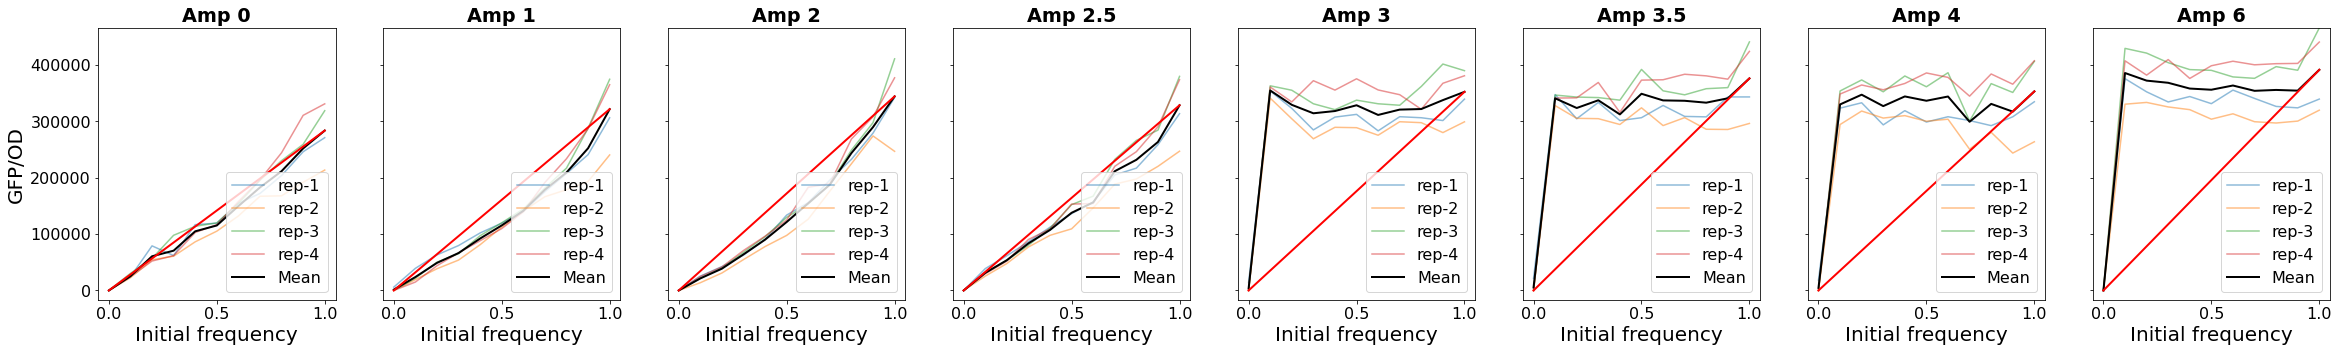

In [21]:
freqs=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
cols=[x for x in np.arange(1,12)]
freqs_dict=dict(zip(cols,freqs))
fig,axs=plt.subplots(1,len(rows),figsize=(5*len(rows),5),sharey=True)

this_df=df_ratioLocalDbg.copy()

mtx=[]
mtxI=[]
polys=[]
polysI=[]
ymax=0
alphas=[]
alphasI=[]
for ri,r in enumerate(amp_dict.keys()):
    amp=amp_dict[r]
    ys_mtx=[]
    hr=24
#     if(amp==0):
#         hr=16
    #print(amp,hr)
    for rep in reps:
        freqs=[]
        
        ys=[]
        for ci,c in enumerate(freqs_dict.keys()):
            freq=freqs_dict[c]
            freqs.append(freq)
            this_key=r+str(c)
            val=this_df[(this_df["Rep"]==rep)&(this_df["Time"]==hr)][this_key].to_numpy()[0]
            ys.append(val)
            if(val>ymax):
                ymax=val
        ys_mtx.append(ys)
        axs[ri].plot(freqs,ys,alpha=.5,label=rep)
        axs[ri].set_title("Amp %s"%amp,fontweight='bold')
    
    ms=[]
    for fi,freq in enumerate(freqs):
        col=[r[fi] for r in ys_mtx]
        m=np.mean(col)
        ms.append(m)
        if(ri==0 and fi==0):
            #print("x")
            y_minA=m
        if(ri==0 and fi==10):
            #print("xx")
            y_maxA=m
    axs[ri].plot(freqs,ms,c='k',lw=2,label="Mean")
    
    axs[ri].plot([0,1],[0,ms[-1]],c='r',lw=2,)
    axs[ri].legend(loc=4)
    axs[ri].set_xlabel("Initial frequency",fontsize=20)
    
    axs[ri].set_ylim(ymax=ymax)
    
    
axs[0].set_ylabel("GFP/OD",fontsize=20) 
figName=figures_path+"Experiment_raw_GFP-OD.png"
#plt.savefig(figName)
 
plt.show()

## Data normalization

xx
Amp:0	freqs:[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]-[0.0, 0.0748088427132454, 0.15392602580689702, 0.23773476889069609, 0.32666512926956554, 0.42120138320048056, 0.5218908484514244, 0.6293544875495564, 0.7442997256179946, 0.8675360418904546, 0.9999940613383008]
Amp:1	freqs:[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]-[0.0, 0.05543256791178703, 0.11664108614296326, 0.18457793438698597, 0.2604170498279882, 0.34562233328817044, 0.4420430679891821, 0.5520496723825911, 0.6787311856213911, 0.8261899226912321, 0.9999940613383008]
Amp:2	freqs:[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]-[0.0, 0.05720309929272665, 0.12011801871265655, 0.18964521575248486, 0.26688491964543515, 0.35319578519422534, 0.45027550099581676, 0.5602735771824103, 0.685952368344747, 0.8309222451716388, 0.9999940613383007]
Amp:2.5	freqs:[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]-[0.0, 0.07097050164274189, 0.1466718343478633, 0.22759333710921914, 0.3142942460107883, 0.4074166365038424, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


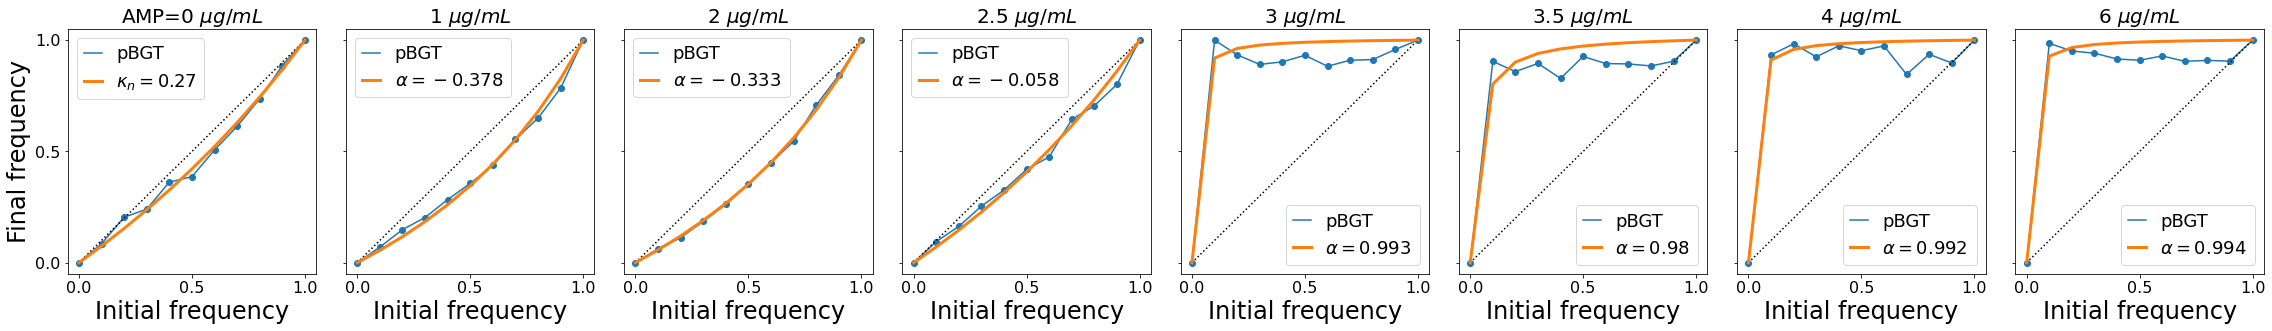

Fitting values
0.27227589582571493 [0.0, -0.37781049928627075, -0.33266226783986735, -0.05845671728600112, 0.9929108533618389, 0.9800999023208216, 0.9920750198502178, 0.9937303523498018]


In [22]:
fig,axs=plt.subplots(1,len(rows),figsize=(4*len(rows),5),sharey=True)
fig.set_facecolor('white')

freqs=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
cols=[x for x in np.arange(1,12)]
freqs_dict=dict(zip(cols,freqs))


this_df=df_ratioLocalDbg.copy()
mtx=[]

ymax=0
alphas3=[]

ys_model=[]
ys_data=[]
for ri,r in enumerate(amp_dict.keys()):
    amp=amp_dict[r]
    ys_mtx=[]
    hr=24
#     if(amp==0):
#         hr=16
    #print(amp,hr)
    for rep in reps:
        if(ri==0 and rep=='rep-2'):
           continue
        freqs=[]
        ys=[]
        for ci,c in enumerate(freqs_dict.keys()):
            freq=freqs_dict[c]
            freqs.append(freq)
            this_key=r+str(c)
            val=this_df[(this_df["Rep"]==rep)&(this_df["Time"]==hr)][this_key].to_numpy()[0]
            ys.append(val)
            if(val>ymax):
                ymax=val
        ys_mtx.append(ys)
        
    ms=[]
    for fi,freq in enumerate(freqs):
        col=[r[fi] for r in ys_mtx]
        m=np.mean(col)
        ms.append(m)
        if(ri==0 and fi==0):
            #print("x")
            y_minA=m
        if(ri==0 and fi==10):
            print("xx")
        y_maxA2=np.max(col)
 
    y_min=y_minA
    y_max=ms[-1]
 
    gr_threshold=ms[0]
    if(gr_threshold<1000000):
        y_min=ms[0]
        
        ys2=[(x-y_min)/(y_max-y_min) for x in ms]
        for yi,y in enumerate(ys2):
            if(y>1):
                print("Value greater than 1* Amp:%s, val: %s"%(amp,y))
                ys2[yi]=1
                #print(amp,yi)
        ys2[-1]=1               ###33 <<<<<<<<< sheep
        mtx.append(ys2)
        
        
    else:
        #print("kkkkkkk",amp,gr_threshold)
        ys2=(ms-y_min)/(y_max-y_min)
        ys2[0]=0
        for yi,y in enumerate(ys2):
            if(y>1):
                print("Value greater than 1* Amp:%s, val: %s"%(amp,y))
                ys2[yi]=1
                #print(amp,yi)
        mtx.append(ys2)
        mtxI.append(ys2) 
        y_max=max_Y
        ys2=ys2[1:]
        freqs=freqs[1:]
        freqsInit=freqsInit[1:]
    
    #print(amp,freqs,ys2)
    ys_data.append(ys2)
    axs[ri].plot(freqs,ys2,label="pBGT")
    axs[ri].scatter(freqs,ys2)
    axs[ri].set_xlabel("Initial frequency",size=24)
    #axs[ri].set_title("Amp: %s"%amp,size='xx-large')
    
    axs[ri].plot([0,1],[0,1],':',c='K')
    freqsnp=np.asarray(freqs)
    ################FIT PARAMS ####################
    if(ri==0):
        popt, pcov = curve_fit(f0, freqs, ys2,bounds=([0,mu_n*0.9999],[1,mu_n*1.0001]))
        gamma3=popt[0]
        alpha=0.
        ys_model.append(f0(freqsnp,gamma3,mu_n))
        axs[ri].plot(freqs,f0(freqsnp,gamma3,mu_n),label=r"$\kappa_n=$%s"%round(gamma3,2), lw=3)
    else:
        popt, pcov = curve_fit(f1, freqs, ys2,bounds=([gamma3*0.9999,-1,mu_n*0.9999],[gamma3*1.0001,1,mu_n*1.0001]))
        alpha=popt[1]
        ys_model.append(f1(freqsnp,gamma3,alpha,mu_n))
        axs[ri].plot(freqs,f1(freqsnp,gamma3,alpha,mu_n),label=r'$\alpha=%s $ '%(round(alpha,3)), lw=3)
    
    alphas3.append(alpha)
    #
    if ri>0:
        axs[ri].set_title ("%s $\mu g/mL$"%amp, fontsize=20)
    else:
        axs[ri].set_title ("AMP=%s $\mu g/mL$"%amp, fontsize=20)
    ys2=[x for x in list(f1(freqsnp,gamma3,alpha,mu_n))]
    print("Amp:%s\tfreqs:%s-%s"%(amp,freqs,ys2))

    #if ri>0:
    #    axs[ri].set_yticks([])
    axs[ri].set_xticks([0, 0.5, 1])
    axs[ri].set_yticks([0, 0.5, 1])
    if ri<4:
        axs[ri].legend (loc=2, fontsize=18,handlelength=1)
    else:
        axs[ri].legend (loc=4, fontsize=18,handlelength=1)

axs[0].set_ylabel("Final frequency",size=24)
plt.rcParams.update({'font.size': 20})
plt.tight_layout()

figName=figures_path+"Fig-3.pdf"
#plt.savefig(figName,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()


print("Fitting values")
print(gamma3,alphas3)


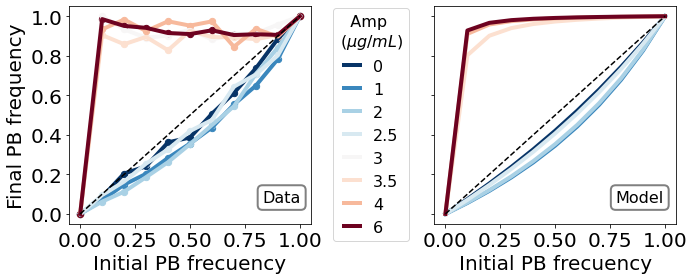

In [23]:

#print(this_alphas)
#colors= plt.cm.RdBu_r(np.linspace(0,1,len(this_alphas)+1))

norm = matplotlib.colors.Normalize(
    #vmin=np.min(ns),
    vmin=-.05,
    vmax=6.05)

#c_m = matplotlib.cm.cool
c_m = matplotlib.cm.RdBu_r
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])



threshold_time=1
x0s=np.linspace(0,1,101)


fig3BC,ax=plt.subplots(1,2,figsize=(12,4),sharey=True,sharex=True)
fig3BC.set_facecolor('white')
for ri,r in enumerate(amp_dict.keys()):
    amp=amp_dict[r]
    
    this_ys_model=ys_model[ri]
    this_ys_data=ys_data[ri]
    this_color=s_m.to_rgba(amp)
    ax[0].plot(freqs,this_ys_data,color=this_color,lw=4, label="%s"%amp)
    ax[0].scatter(freqs,this_ys_data,color=this_color,s=40 )
    alabel=r"$\alpha=$%s"%round(alphas3[ri],2)
    if(ri==0):
        alabel=r"$\kappa_n$=%s"%round(gamma3,2)
    ax[1].plot(freqs,this_ys_model,color=this_color,lw=4, label=alabel)

ax[0].plot([0,1],[0,1],linestyle='dashed',c='k')
ax[1].plot([0,1],[0,1],linestyle='dashed',c='k')
#cbar=plt.colorbar(s_m)
#cbar.ax.get_yaxis().labelpad = 10
#cbar.set_label('Amp', rotation=90,size=20)


ax[0].set_ylabel("Final PB frequency",fontsize=20)
ax[0].set_xlabel("Initial PB frecuency",fontsize=20)
ax[1].set_xlabel("Initial PB frecuency",fontsize=20)

ax[0].set_ylim([-0.05,1.05])
ax[1].set_xlim([-0.05,1.05])
plt.rcParams.update({'font.size': 16})
ax[0].annotate("Data",xy=(.8,.1),xycoords="axes fraction",bbox=dict(boxstyle="round",fc="white",  ec="gray", lw=2))
ax[1].annotate("Model",xy=(.75,.1),xycoords="axes fraction",bbox=dict(boxstyle="round",fc="white",  ec="gray", lw=2))
ax[0].set_aspect(.9/ax[0].get_data_ratio())
ax[1].set_aspect(.9/ax[1].get_data_ratio())


l0=ax[0].legend(title="  Amp\n($\mu g/mL$)",loc='upper center',handlelength=1,bbox_to_anchor =(1.25,1.03))#, bbox_to_anchor = (0,-.1,1.95,1),            bbox_transform = plt.gcf().transFigure)
#l0=ax[1].legend(title=r"Parameters",loc='upper center',handlelength=1,bbox_to_anchor =(1.35,1.03))#, bbox_to_anchor = (0,-.1,1.95,1),            bbox_transform = plt.gcf().transFigure)
#fig3BC.tight_layout()

figName=figures_path+"Fig-3_BC.pdf"
plt.savefig(figName,bbox_inches = 'tight',pad_inches = 0.1)
figName=figures_path+"Fig-3_BC.png"
plt.savefig(figName,bbox_inches = 'tight',pad_inches = 0.1)


plt.show()

# Figure 4


## A

In [24]:
n =NpBGT
cc=pBGT_cost
x0 =1. 


TrMAX =100
Tmax=1000

ns=[1,2,5,10,20,30,40,50,55,60]
ns=np.linspace(1,50,50)
f4a_ns=[int(x) for x in ns]
print(f4a_ns)
a=.9999

f4a_ccs=np.linspace(0,.05,11)
f4a_ccs=f4a_ccs[1:]
f4a_ccs=np.concatenate((f4a_ccs,[pBGT_cost]),axis=0)
print(f4a_ccs)


Trs=np.linspace(1,TrMAX,TrMAX)
f4a_Trs=[int(x) for x in Trs]

print(f4a_Trs)

f4a_xs=[]
f4a_ys=[]
for cc in f4a_ccs:
    xs=[]
    ys=[]
    for n in f4a_ns:        
        #cc=round(cc,4)
        c = cc*n
        #print(cc,end=",")
        if(c>=1):
            #print(n,"max PCN")
            continue
        this_t=1    
        for T in f4a_Trs:
            nts=int(Tmax/T)
            X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
            # if(X[-1]>1-1e-2):
            #     this_t=T
            if(X[nts*T]>=X[T*(nts-1)] and X[nts*T]>1e-7):
                this_t=T
            
        xs.append(n)
        ys.append(this_t)

    f4a_ys.append(ys)   
    f4a_xs.append(xs)   
    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0.005      0.01       0.015      0.02       0.025      0.03
 0.035      0.04       0.045      0.05       0.01433032]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


[0.   0.02 0.04]


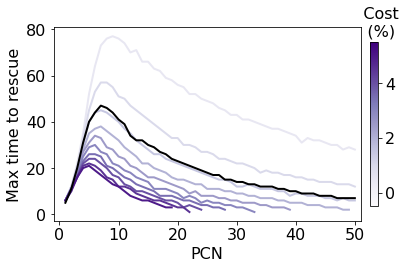

In [25]:
fig4A=plt.figure(figsize=(6,4))
fig4A.set_facecolor('white')
plt.rcParams.update({'font.size': 16})
colors = plt.cm.Purples(np.linspace(0,1,len(f4a_ccs)+2))
norm = matplotlib.colors.Normalize(
    vmin=-.005,
    vmax=np.max(f4a_ccs)+.005)

# choose a colormap
c_m = matplotlib.cm.Purples
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

for ci,cc in enumerate(f4a_ccs):
    this_color=s_m.to_rgba(cc)
    if(cc==pBGT_cost):
        this_color='k'
    xs=f4a_xs[ci]
    ys=f4a_ys[ci]
    #ax1.plot(xs,ys, linewidth =2.0,color=this_color )
    plt.plot(xs,ys, linewidth =2.0,color=this_color )

cbar=plt.colorbar(s_m,shrink=.85,fraction=.1,pad=.025)
cbar.ax.set_title("   Cost\n   (%)",size=16)

cbl=cbar.ax.get_yticks()
print(cbl)
cbl=[int(round(x*100,2)) for x in cbl]

cbar.ax.set_yticklabels(cbl)

plt.xlim([-1,ns[-1]+1])
plt.xlabel('PCN')#,fontsize=20)
plt.ylabel('Max time to rescue')#,fontsize=20)
plt.xlim([-1,ns[-1]+1])
plt.xlabel('PCN')#,fontsize=20)
plt.ylabel('Max time to rescue')#,fontsize=20)


plt.rcParams.update({'font.size': 16})
plt.tight_layout()
figname=figuresDir+"Fig-4_A.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-4_A.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


## B


In [26]:
cc = kappaN/NpBGT
x0 =1. 

Tmax =1000000

ns=np.linspace(1,50,50)
ns=[int(x) for x in ns]
print("PCNs:",ns)

f4b_talphas=np.linspace(0,1,51)
f4b_talphas=np.linspace(0,1,11)

f4b_talphas=f4b_talphas[1:]
f4b_talphas[-1]=.99
print("alphas:",f4b_talphas)


Trs=np.linspace(1,50,50)
Trs=[int(x) for x in Trs]
print("Freq:",Trs)

f4b_xs=[]
f4b_ys=[]
for a in f4b_talphas:
    a=round(a,3)
    print("\n",a, end=" - ")
    xsn=[]
    ysT=[]
    for n in ns:#plt.tigth        
        #print("",n, end=",")
        print(".",end="")
        #cc=round(cc,4)
        c = cc*n
        #print(cc,end=",")
        if(c>=1):
            #print(n,"max PCN")
            continue
        this_t=np.nan    
        for T in Trs:
            Tmax=T*1000
            nts=int(Tmax/T)
            
            X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
            #if(X[-1]>1e-100):
            indx=[]
            indx=get_first_rep_peak(X,T,nts)
            if((X[nts*T]>=X[T*(nts-1)] or indx!=[]) and X[nts*T]>1e-100):
                this_t=T
            else:
                #print(T,X[nts*T],X[T*(nts-1)],X[T*(nts-2)],indx==[],end=",") 
                break
        
        xsn.append(n)
        ysT.append(this_t)
    xs=np.linspace(xsn[0],xsn[-1],1000)
    ys=np.interp(xs, xsn, ysT)
    f4b_xs.append(xs)
    f4b_ys.append(ys)
    

PCNs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
alphas: [0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.99]
Freq: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

 0.1 - ..................................................
 0.2 - ..................................................
 0.3 - ..................................................
 0.4 - ..................................................
 0.5 - ..................................................
 0.6 - ..................................................
 0.7 - ..................................................
 0.8 - ..................................................
 0.9 - ..................................................
 0.99 - .............

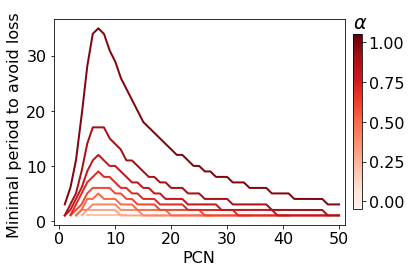

In [27]:
norm = matplotlib.colors.Normalize( vmin=-.05, vmax=1.05   )

# choose a colormap
c_m = matplotlib.cm.Reds
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

fig=plt.figure(figsize=(6,4))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 16})

for ai,a in enumerate(f4b_talphas):
    ys=f4b_ys[ai]
    xs=f4b_xs[ai]
    plt.plot(xs,ys, linewidth =2.0,color=s_m.to_rgba(a) )
cbar=plt.colorbar(s_m,shrink=.85,fraction=.1,pad=.025)
cbar.ax.set_title(r" $\alpha$")#,size=14)


plt.xlim([-1,ns[-1]+1])
plt.xlabel('PCN')#,fontsize=20)
plt.ylabel('Minimal period to avoid loss ')#,fontsize=15)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
figname=figuresDir+"Fig-4_B.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-4_B.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()


## C

In [28]:

n =NpBGT
cc = kappaN/NpBGT
cc=pBGT_cost
x0 = 1.0

a=.99
Tmax =100000
T= 1   

ns=[1,2,5,10,20,30,40,50,55,60]
f4c_ns=[int(NpBGT*.5),NpBGT,NpBGT*2]
f4c_ns=[5,NpBGT,30]

print("PCNs:",f4c_ns)
Trs=np.linspace(1,200,101)
Trs=np.linspace(1,50,50)
Trs=[int(x) for x in Trs]
print("Ts:",Trs)
Time = np.linspace(0, Tmax, Tmax+1)
flag=True
f4c_t_ex=[]
f4c_t_fix=[]
f4c_t_co=[]
for ni,n in enumerate(f4c_ns):
    c = cc*n
    if(c>=1):
        print(n,"max PCN")
        continue
    t_ex=[]
    t_fix=[]
    t_co=[]
    print("\n",n,end="-")
    for T in Trs:   
        print(T,end=",") 
        Tmax_exp=1
        indxs=[]
        while(indxs==[]):    
            Tmaxi=10**Tmax_exp
            nts=int(Tmaxi/T)
            X = solutionPlasmidsPeaks(x0, n, c, Tmaxi, T, a)
            indxs=get_first_rep_peak(X,T,nts)
            Tmax_exp=Tmax_exp+1
            
            if(Tmax_exp>7):
                indxs=[Tmaxi]
                print("longer than 1e7",(c,a,vf))
                break
            
        indx=indxs[0]
        v=indx
        ve=np.nan
        vf=np.nan
        vt=np.nan
        if(X[nts*T]>1-5e-3):
            vf=v
            vt=v
            if(n==NpBGT):
                p0=(T,v)
        elif(X[nts*T]<1e-100):
            ve=v
            if(n==NpBGT and flag):
                p1=(T,v)
                flag=False
        elif((abs(X[nts*T]-X[(nts-1)*T])<1e-10) & (np.isnan(vf)) & (np.isnan(ve))):
            vt=v
        else:
            print("None",n,a,v,T,X[nts*T],X[(nts-1)*T],vf,ve,abs(X[nts*T]-X[(nts-1)*T]),vt)
        t_ex.append(ve)
        t_fix.append(vf)
        t_co.append(vt)
        
    f4c_t_ex.append(t_ex)
    f4c_t_fix.append(t_fix)
    f4c_t_co.append(t_co)
    

PCNs: [5, 19, 30]
Ts: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

 5-1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
 19-1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
 30-1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

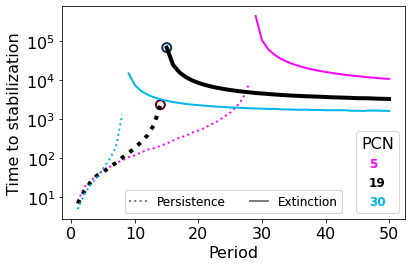

In [29]:
fig=plt.figure(figsize=(6,4))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 16})
# choose a colormap
c_m = matplotlib.cm.Blues
# create a ScalarMappable and initialize a data structure
norm = matplotlib.colors.Normalize(vmin=-10,vmax=40)
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
#s_m.set_array([])
colors = plt.cm.cool(np.linspace(0,1,len(f4c_ns)))
n=NpBGT
for ni,this_n in enumerate(f4c_ns):
    t_ex=f4c_t_ex[ni]
    t_fix=f4c_t_fix[ni]
    t_co=f4c_t_co[ni]
    if this_n==n:
        tcol='k'
        lw=4.0
    elif this_n<n:
        tcol=colors[-1]
        lw=2.0
    else:
        tcol='#00B5EE'
        lw=2.0
    
    plt.plot(Trs,t_co, linewidth =lw,linestyle="dotted", color=tcol)
    plt.plot(Trs,t_ex, linewidth =lw, color=tcol)


lines = plt.gca().get_lines()
chleg=[1,3,5]
legendx = plt.legend([lines[i] for i in chleg],['%s'%f4c_ns[0],'%s'%f4c_ns[1],'%s'%f4c_ns[2],], loc=4,title="PCN",handlelength=0, handletextpad=0,fancybox=True,title_fontsize='medium',fontsize=12)#,frameon=False) #9
for line, text in zip(legendx.get_lines(), legendx.get_texts()):
    text.set_color(line.get_color())
    text.set_alpha(2)
    text.set_fontweight(800)
for item in legendx.legendHandles:
    item.set_visible(False)

plt.gca().add_artist(legendx)

chleg=[len(lines)-2,len(lines)-1]
legend2 = plt.legend([lines[i] for i in chleg],['Persistence','Extinction'], loc=8,ncol=2,fontsize=12,handlelength=1.5)
for line in legend2.get_lines():
    line.set_color('gray')

plt.gca().add_artist(legend2)

colors = plt.cm.RdBu(np.linspace(0,1,2)) 
plt.scatter(p0[0],p0[1],s=80,facecolors='none', edgecolors=colors[0],linewidth=2)
plt.scatter(p1[0],p1[1],s=80,facecolors='none', edgecolors=colors[1],linewidth=2)

plt.yscale("symlog")
plt.xlabel('Period')#,fontsize=16)
plt.ylabel('Time to stabilization')#,fontsize=16)
plt.tight_layout()

figname=figuresDir+"Fig-4_C.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-4_C.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()


## D

[]
[]


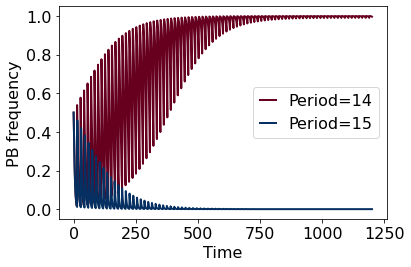

In [30]:
n =NpBGT

cc = kappaN/NpBGT
cc=pBGT_cost
c = cc*n
x0 = 1.0
x0 = 0.5

Tmax = 1200
Ts = [14,15]    

colors = plt.cm.RdBu(np.linspace(0,1,len(Ts))) 

a=0.99
fig=plt.figure(figsize=(6,4))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 16})

Time = np.linspace(0, Tmax, Tmax+1)

for ti,T in enumerate(Ts):
    c = cc*n
    nts=int(Tmax/T)
    X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
    indxs=get_first_rep_peak(X,T,nts)
    print(indxs)
    plt.plot(Time, X, linewidth = 2.0,c=colors[ti], label = "Period=" + str(T))

plt.ylim([-0.05,1.05])
plt.xlabel('Time')
plt.ylabel('PB frequency')
#plt.xscale("logit")
plt.legend(handlelength=1)
#plt.title(r"Periodic enforcing - $\alpha =%s$"%a,fontsize=20)
plt.tight_layout()
figname=figuresDir+"Fig-4_D.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-4_D.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)


plt.show()




# Figure 5

### Data plasmids from literature

In [33]:
this_table=table_nature+"pcnCost_table.csv"

pcnvsCost_df=pd.read_csv(this_table,sep="\t")

pcns_nature=list(pcnvsCost_df["PCN"])
pcns_nature_sd=list(pcnvsCost_df["PCN SD"])

costs_nature=list(pcnvsCost_df["Cost"])
costs_nature_perPlasmid=[100*c/pn for c,pn in zip(costs_nature,pcns_nature)]
cost_nature_sd=list(pcnvsCost_df["Cost SD"])
costs_nature_perPlasmid_sd=[100*csd/pn for csd,pn in zip(cost_nature_sd,pcns_nature)]

pcns_nature,pcns_nature_sd

([10.53,
  20.45,
  25.02,
  18.0,
  52.0,
  11.03,
  19.12,
  21.1,
  44.5,
  88.93,
  52.3,
  127.29],
 [1.112, 2.59, 1.92, 2.4, 0.0, 1.89, 1.56, 0.85, 3.81, 15.65, 2.19, 4.58])

## A

In [35]:
x0 =1.0
cc =kappaN/NpBGT
T=1

fig5a_talphas=[x for x in np.linspace(0,1,6)]
fig5a_talphas=[x for x in np.linspace(0,1,101)]
print("Alphas:",fig5a_talphas)

x1=np.linspace(.001,.02,20)
x2=np.linspace(.02,.1,21)[1:]
fig5a_ccs=np.concatenate((x1,x2))

print("Costs:",fig5a_ccs)

Tmax = 1000 #1000
Time = np.linspace(0, Tmax, Tmax+1)
lens=[]
fig5a_ccx_list=[]
fig5a_opPCNs_list=[]
fig5a_opPCN_last_list=[]
for ai,a in enumerate(fig5a_talphas):
    a=round(a,2)
    opPCNs=[]
    ccx=[]
    opPCN_last_points=[]
    for ic, cc in enumerate(fig5a_ccs):
        maxPCN=int(.999999999/cc)
        
        cc=round(cc,5)
        print(a,cc,maxPCN,end=" - ")
        areas=[]
        nsx=[]
        last_points=[]
        
        maxPCN=min(maxPCN,94)  #95 is maxPCN suported
        for ni, n in enumerate(range(1,maxPCN+1)):
            cc=Decimal(cc)
            c = cc*n
            if(c>=1):
                continue
            if(mutationrate(n)==0):
                print("no n:",n)
                continue
            X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
            coords=[(t,y) for t,y in zip(Time,X)]
            coords.append((Time[-1],0))
            coords.append((0,0))
            poly=Polygon(coords)
            areaPCN=poly.area
            nsx.append(n)
            areas.append(areaPCN)
            last_points.append(X[-1])
            
            if(X[-1]>.001):
                print((n,round(X[-1],3),areaPCN),end="")
            print(".",end="")
        maxArea=np.max(areas)
        idxs=[i for i, x in enumerate(areas) if x == maxArea]
        lens.append(len(idxs))
        ind=idxs[-1]
        opPCN=nsx[ind]
        this_last_point=last_points[ind]
        opPCNs.append(opPCN)
        opPCN_last_points.append(this_last_point)
        ccx.append(round(100*cc,1))
        print(opPCN,end="\r")#,areas)
    fig5a_ccx_list.append(ccx)
    fig5a_opPCNs_list.append(opPCNs)
    fig5a_opPCN_last_list.append(opPCN_last_points)
    

Alphas: [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0]
Costs: [0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012
 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.024 0.028 0.032 0.036
 0.04  0.044 0.048 0.052 0.056 0.06  0.064 0.068 0.072 0.076 0.08  0.084
 0.088 0.092 0.096 0.1  ]


maxs PCN: [999, 499, 333, 249, 199, 166, 142, 124, 111, 99, 90, 83, 76, 71, 66, 62, 58, 55, 52, 49, 41, 35, 31, 27, 24, 22, 20, 19, 17, 16, 15, 14, 13, 13, 12, 11, 11, 10, 10, 9]


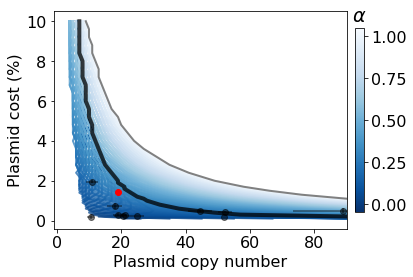

100 0


In [36]:
fig,ax=plt.subplots(figsize=(6,4))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 16})

colors = plt.cm.Reds(np.linspace(0,1,len(fig5a_talphas)+4))
colors = plt.cm.RdBu_r(np.linspace(0,1,len(fig5a_talphas)+4))

c_m = matplotlib.cm.Blues_r
norm = matplotlib.colors.Normalize(vmin=np.min(fig5a_talphas)-.005,vmax=np.max(fig5a_talphas)+.005)
norm = matplotlib.colors.Normalize(vmin=-.05,vmax=1.05)
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])
minpcn=100

coex_threshold=1e-5
alphastar=0
for ai,a in enumerate(fig5a_talphas):
    ccx=fig5a_ccx_list[ai]
    opPCNs=fig5a_opPCNs_list[ai]
    last_points=fig5a_opPCN_last_list[ai]
    ### This section identifies the lowest value and finds the corresponding alpha
    cc_coex=[c for c,lp in zip(ccx,last_points) if lp>coex_threshold]
    op_coex=[op for op,lp in zip(opPCNs,last_points) if lp>coex_threshold]
    cc_loss=[c for c,lp in zip(ccx,last_points) if lp<coex_threshold]
    op_loss=[op for op,lp in zip(opPCNs,last_points) if lp<coex_threshold]
    plt.plot(opPCNs,ccx,linewidth = 2.0,color=s_m.to_rgba(a),label=round(a,2),alpha=.75)


alphastar=0       ######## to draw the alpha 0 line
for ai,a in enumerate(fig5a_talphas):
    ccx=fig5a_ccx_list[ai]
    opPCNs=fig5a_opPCNs_list[ai]
    if(alphastar==a):
        plt.plot(opPCNs,ccx,linewidth = 4.0,color="black",label=round(a,2),alpha=.75)



############### Here we add data
plt.scatter(pcns_nature,costs_nature_perPlasmid,c='black',zorder=3,alpha=.5)
#plt.errorbar(pcns_nature,costs_nature_perPlasmid,fmt='o',xerr=pcns_nature_sd,yerr=costs_nature_perPlasmid_sd,c='black',barsabove=True,zorder=3)
plt.errorbar(pcns_nature,costs_nature_perPlasmid,fmt='none',xerr=pcns_nature_sd,yerr=costs_nature_perPlasmid_sd,c='black',barsabove=True,zorder=3,alpha=.5)

plt.scatter(NpBGT,pBGT_cost*100,c='r',zorder=3)

##########################################

cbar=plt.colorbar(s_m,shrink=.85,fraction=.1,pad=.025)
cbar.ax.set_title(r"$\alpha$")#,size=14)

plt.xlim([-1,90])

plt.ylabel('Plasmid cost (%)')
plt.xlabel('Plasmid copy number')

maxPCNs=[int(.999999999/c) for c in fig5a_ccs]
print("maxs PCN:",maxPCNs)

plt.plot(maxPCNs,fig5a_ccs*100,c='gray',linewidth = 2.0)

maxPCNs2=maxPCNs
fig5a_ccs2=fig5a_ccs*100

maxPCNs2=np.concatenate((maxPCNs2,[1]))
ccs2=np.concatenate((fig5a_ccs2,[10]))

figname=figuresDir+"Fig-5_A.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-5_A.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()
print(minpcn,alphastar)

## B

In [37]:
x0 =1.0

cc=pBGT_cost
nmax=56

f5b_talphas=[x for x in np.linspace(0,1,6)]
f5b_talphas[-1]=.99
f5b_talphas.append(1)
print("Alphas:",f5b_talphas)

tsmax=60
Ts=[int(x) for x in np.linspace(0,tsmax,tsmax+1)]
Ts=[int(x) for x in np.linspace(1,tsmax,tsmax)]
print("Ts:",Ts)
 

Tmax = 600
Tmax = 10000
Time = np.linspace(0, Tmax, Tmax+1)

f5b_tx_list=[]
f5b_opPCN_list=[]
f5b_opPCN_last_list=[]

for ai,a in enumerate(f5b_talphas):    
    
    opPCNs=[]
    tx=[]
    opPCNs_last_points=[]
    a=round(a,3)
    for it,T in enumerate(Ts):
        maxPCN=int(.999999999/cc)
        print(a,T,maxPCN,end=" - ")
        areas=[]
        nsx=[]
        last_points=[]
        maxPCN=min(maxPCN,94)  #95 is maxPCN suported
        for ni, n in enumerate(range(1,maxPCN+1)):
        #for ni, n in enumerate(ns):
            c = cc*n
            if(c>=1):
                continue
            if(mutationrate(n)==0):
                print("no n:",n)
                continue
            X = solutionPlasmidsPeaks(x0, n, c, Tmax, T, a)
            print(".",end="")
            coords=[(t,y) for t,y in zip(Time,X)]
            coords.append((Time[-1],0))
            coords.append((0,0))
            poly=Polygon(coords)
            areaPCN=poly.area
            nsx.append(n)
            areas.append(areaPCN)
            last_points.append(X[-1])

        maxArea=np.max(areas)
        ind=areas.index(maxArea)
        opPCN=nsx[ind]
        this_last_point=last_points[ind]
        opPCNs.append(opPCN)
        tx.append(T)
        opPCNs_last_points.append(this_last_point)
        print(opPCN,end="\r")#,areas)
    f5b_tx_list.append(tx)
    f5b_opPCN_list.append(opPCNs)
    f5b_opPCN_last_list.append(opPCNs_last_points)


Alphas: [0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 0.99, 1]
Ts: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


0.0 0 60 [] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
0.2 1 59 [1] [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
0.4 4 56 [1, 2, 3, 4] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
0.6000000000000001 7 53 [1, 2, 3, 4, 5, 6, 7] [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
0.8 12 48 [1, 2

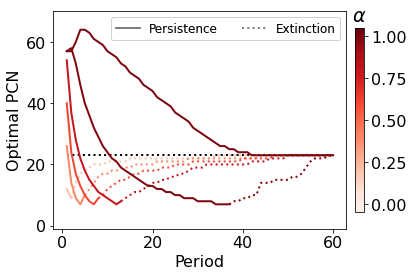

In [38]:
fig,ax=plt.subplots(figsize=(6,4))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 16})
norm = matplotlib.colors.Normalize(vmin=-.05,vmax=1.05)
c_m = matplotlib.cm.Reds
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

coex_threshold=1e-7

for tx,opPCNs,last_points,a in zip(f5b_tx_list,f5b_opPCN_list,f5b_opPCN_last_list,f5b_talphas):

    this_color=s_m.to_rgba(a)
    if(a==0):
        this_color='k'
    tx_coex=[x for x,lp in zip(tx,last_points) if lp>coex_threshold]
    op_coex=[op for op,lp in zip(opPCNs,last_points) if lp>coex_threshold]
    op_loss=[op for op,lp in zip(opPCNs,last_points) if lp<coex_threshold]
    tx_loss=[x for x,lp in zip(tx,last_points) if lp<coex_threshold]
    print(a,len(op_coex),len(op_loss),tx_coex,tx_loss)

    op_coexp=op_coex
    tx_coexp=tx_coex
    if(len(tx_loss)>0):
        op_coexp=op_coex+[op_loss[0]]
        tx_coexp=tx_coex+[tx_loss[0]]

    plt.plot(tx_coexp,op_coexp,linewidth = 2.0,ls="solid",color=this_color)#,alpha=.5)#,label=round(a,2))
    plt.plot(tx_loss,op_loss,linewidth = 2.0,ls="dotted",color=this_color)#,alpha=.5)#,label=round(a,2))

cbar=plt.colorbar(s_m,shrink=.85,fraction=.1,pad=.025)
cbar.ax.set_title(r"$\alpha$")#,size=14)

lines = plt.gca().get_lines()
chleg=[len(lines)-2,len(lines)-1]
legend2 = plt.legend([lines[i] for i in chleg],['Persistence','Extinction'], loc='upper right', ncol=2,fontsize=12) 
for line in legend2.get_lines():
    line.set_color('gray')
plt.gca().add_artist(legend2)

plt.ylim([-1,70])
plt.xlabel('Period')#,fontsize=20)
plt.ylabel('Optimal PCN')#,fontsize=20)


figname=figuresDir+"Fig-5_B0.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-5_B0.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()


0.0 0 60 [] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
0.2 1 59 [1] [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
0.4 4 56 [1, 2, 3, 4] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
0.6000000000000001 7 53 [1, 2, 3, 4, 5, 6, 7] [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
0.8 12 48 [1, 2

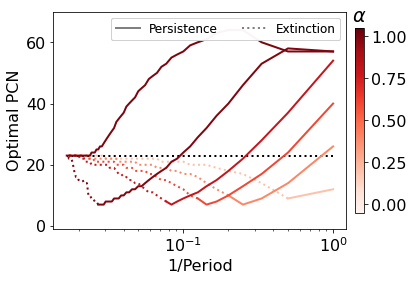

In [39]:
fig,ax=plt.subplots(figsize=(6,4))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 16})
norm = matplotlib.colors.Normalize(vmin=-.05,vmax=1.05)
c_m = matplotlib.cm.Reds
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

coex_threshold=1e-7

for tx,opPCNs,last_points,a in zip(f5b_tx_list,f5b_opPCN_list,f5b_opPCN_last_list,f5b_talphas):
    this_color=s_m.to_rgba(a)
    if(a==0):
        this_color='k'
    
    tx_coex=[x for x,lp in zip(tx,last_points) if lp>coex_threshold]
    op_coex=[op for op,lp in zip(opPCNs,last_points) if lp>coex_threshold]
    op_loss=[op for op,lp in zip(opPCNs,last_points) if lp<coex_threshold]
    tx_loss=[x for x,lp in zip(tx,last_points) if lp<coex_threshold]
    print(a,len(op_coex),len(op_loss),tx_coex,tx_loss)

    tx_coex=[1/x for x in tx_coex]
    tx_loss=[1/x for x in tx_loss]
    tx=[1/x for x in tx]


    op_coexp=op_coex
    tx_coexp=tx_coex
    if(len(tx_loss)>0):
        op_coexp=op_coex+[op_loss[0]]
        tx_coexp=tx_coex+[tx_loss[0]]
    
    
    plt.plot(tx_coexp,op_coexp,linewidth = 2.0,ls="solid",color=this_color)#,alpha=.5)#,label=round(a,2))
    plt.plot(tx_loss,op_loss,linewidth = 2.0,ls="dotted",color=this_color)#,alpha=.5)#,label=round(a,2))
    #plt.plot(tx,opPCNs,linewidth = 2.0,ls="dotted",color=this_color,alpha=.5)#,label=round(a,2))

cbar=plt.colorbar(s_m,shrink=.85,fraction=.1,pad=.025)
cbar.ax.set_title(r"$\alpha$")#,size=14)

lines = plt.gca().get_lines()
chleg=[len(lines)-2,len(lines)-1]
legend2 = plt.legend([lines[i] for i in chleg],['Persistence','Extinction'], loc='upper right', ncol=2,fontsize=12) 
for line in legend2.get_lines():
    line.set_color('gray')
plt.gca().add_artist(legend2)


plt.ylim([-1,70])
plt.xscale("log")
plt.xlabel('1/Period')#,fontsize=20)
plt.ylabel('Optimal PCN')#,fontsize=20)


figname=figuresDir+"Fig-5_B.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-5_B.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


## C-E data



### Generate Random envs

In [41]:
   
ndays=1000
max_tries=1000
numEs=1000


numBins=20  #Number of bins

file_envsH=randomEnvs+"Random_envs_Binomial_BinsH_T-%s.npy"%ndays
file_envs_simple=randomEnvs+"Random_envs_Binomial_T-%s.json"%ndays
file_envs_simplex=randomEnvs+"Random_envs_Binomialx_T-%s.json"%ndays
file_envsF=randomEnvs+"Random_envs_Binomial_BinsF_T-%s.npy"%ndays



remakeEnvs=False
#remakeEnvs=True
if(remakeEnvs):
    
    Es,Es_BinsH,Es_BinsF=getRandomEnvironmentsUniformEntropies(ndays,max_tries,numBins,numEs)
    Es_purged=purge_repeated_envs(Es,numBins,numEs,Es_BinsH,Es_BinsF)
    print("Saving environments")
    np.save(file_envsH,Es_BinsH)
    np.save(file_envsF,Es_BinsF)
    jsonSaveEs(file_envs_simple,Es)
    jsonSaveEs(file_envs_simplex,Es_purged)
    print("done!")
else:
    print("Loading saved environments")
    Es_BinsH=np.load(file_envsH,allow_pickle=True)
    Es_BinsF=np.load(file_envsF,allow_pickle=True)
    Es=jsonLoadEs(file_envs_simple)
    Es_purged=jsonLoadEs(file_envs_simplex)
    print("done!")



Loading saved environments
done!


### Make/load rand env simulations

In [43]:
ndays=len(Es[0]['Ev'])
Tmax=ndays
x0=1.
Time = np.linspace(0, Tmax, Tmax+1)
cc=pBGT_cost
cc=round(cc,5)
maxPCN=int(.999999999/pBGT_cost)
maxPCN=min(maxPCN,94)  #95 is maxPCN suported

talphas=[x for x in np.linspace(0,1,6)]
talphas[-1]=.99
talphas.append(1)
talphas=[0.,.25,kappaN,.5,.75,.99,1]
#talphas=[.25,.75]
#talphas=[.75]



file_simsH=sims_path+"Random_envs_Binomial_Sims_Hs_T-%s.npy"%ndays
file_simsF=sims_path+"Random_envs_BinomialSims_Fs_T-%s.npy"%ndays
file_simsP=sims_path+"Random_envs_Binomial_Sims_OpPCNs_T-%s.npy"%ndays
file_sims_fp=sims_path+"Random_envs_Binomial_Sims_final_points_T-%s.npy"%ndays


Hx_list=[]
Fx_list=[]
opPCNs_list=[]
opPCNs_lastP_list=[]
lnsims=len(Es_purged)


remakeEnvSims=False
#remakeEnvSims=True

if(remakeEnvSims):
    for a in talphas:
        a=round(a,3)
        opPCNs=[]
        Hx=[]
        Fx=[]
        opPCNs_lastPs=[]
        for ie,thisE in enumerate(Es_purged):
            thisE_T=thisE['Ev']
            this_H=thisE['shannon']
            this_F=thisE['frac_1']
            
            print("\r%s %s%%"%(a,round(100*(ie)/lnsims,2)),end="")
            nsx=[]
            areas=[]
            last_points=[]
            for ni, n in enumerate(range(1,maxPCN+1)):
            #for ni, n in enumerate(ns):
                cc=Decimal(cc)
                c = cc*n
                c=round(c,5)
                if(c>=1):
                    continue
                if(mutationrate(n)==0):
                    print("no n:",n)
                    continue
                X = solutionPlasmidsEnv(x0, n, c, Tmax, thisE_T, a)
                coords=[(t,y) for t,y in zip(Time,X)]
                coords.append((Time[-1],0))
                coords.append((0,0))
                poly=Polygon(coords)
                areaPCN=poly.area
                nsx.append(n)
                areas.append(areaPCN)
                last_points.append(X[-1])
                
                
            maxArea=np.max(areas)
            ind=areas.index(maxArea)
            opPCN=nsx[ind]
            this_last_point=last_points[ind]
            opPCNs.append(opPCN)
            opPCNs_lastPs.append(this_last_point)
            Hx.append(this_H)
            Fx.append(this_F)
            #print(opPCN,end="\r")#,areas)
        print()
        Hx_list.append(Hx)
        Fx_list.append(Fx)
        opPCNs_list.append(opPCNs)
        opPCNs_lastP_list.append(opPCNs_lastPs)
    print("Saving sims F")
    np.save(file_simsH,Hx_list)
    np.save(file_simsF,Fx_list)
    np.save(file_simsP,opPCNs_list)
    np.save(file_sims_fp,opPCNs_lastP_list)
    print("Done!")

else:
    print("Loading sims F")
    Hx_list=np.load(file_simsH,allow_pickle=True)
    Fx_list=np.load(file_simsF,allow_pickle=True)
    opPCNs_list=np.load(file_simsP,allow_pickle=True)
    opPCNs_lastP_list=np.load(file_sims_fp,allow_pickle=True)
    print("Done!")



Loading sims F
Done!


## C

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1

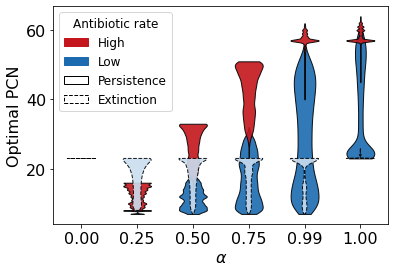

In [44]:
fig,ax=plt.subplots(1,1,figsize=(6,4),sharey=True)
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 20})
norm = matplotlib.colors.Normalize(vmin=-.05,vmax=1.05)
c_m = matplotlib.cm.Reds
c_mB = matplotlib.cm.Blues
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])
s_mB = matplotlib.cm.ScalarMappable(cmap=c_mB, norm=norm)
s_mB.set_array([])


coe_threshold=1e-7
sub_alphas=[0.,.25,.5,.75,.99,1]

for aii,a in enumerate(sub_alphas):
    ai=talphas.index(a)
    loss_colorR=s_m.to_rgba(.2)
    loss_colorB=s_mB.to_rgba(.2)
    coex_colorR=s_m.to_rgba(.8)
    coex_colorB=s_mB.to_rgba(.8)

    Hx=Hx_list[ai]
    opPCNs=opPCNs_list[ai]
    Fx=Fx_list[ai]
    opPCNs_lastP=[float(x) for x in opPCNs_lastP_list[ai]]

    Hflow_coex=[]
    Hfhigh_coex=[]
    Hflow_loss=[]
    Hfhigh_loss=[]
    opflow_coex=[]
    opfhigh_coex=[]
    opflow_loss=[]
    opfhigh_loss=[]

    for h,f,op,lastp in zip(Hx,Fx,opPCNs,opPCNs_lastP):
        if((f<=.5)&(lastp<coe_threshold)):
            Hflow_loss.append(h)
            opflow_loss.append(op)
        elif((f<=.5)&(lastp>coe_threshold)):
            Hflow_coex.append(h)
            opflow_coex.append(op)
        elif((f>.5)&(lastp<coe_threshold)):
            Hfhigh_loss.append(h)
            opfhigh_loss.append(op)
        else:
            Hfhigh_coex.append(h)
            opfhigh_coex.append(op)    

    vlists=[opflow_coex,opfhigh_coex]            
    pos_lists=[aii,aii]
    colors=[ coex_colorB,coex_colorR]
    palphas=[.9,.9]

    empty_index=[i for i,x in enumerate(vlists) if len(x)==0]
    for i in sorted(empty_index, reverse=True):
        del vlists[i]
        del pos_lists[i]
        del colors[i]
        del palphas[i]
    if(vlists):
        parts=ax.violinplot(vlists,positions=pos_lists,showmedians=False,showextrema=False)
        for i,pc in enumerate(parts['bodies']):
            pc.set_facecolor(colors[i])
            pc.set_edgecolor('black')
            pc.set_alpha(palphas[i])
        
    vlists=[opflow_loss,opfhigh_loss]            
    pos_lists=[aii,aii]
    colors=[loss_colorB,loss_colorR]
    palphas=[.9,.9]

    empty_index=[i for i,x in enumerate(vlists) if len(x)==0]
    for i in sorted(empty_index, reverse=True):
        del vlists[i]
        del pos_lists[i]
        del colors[i]
        del palphas[i]

    parts=ax.violinplot(vlists,positions=pos_lists,showmedians=False,showextrema=False)
    
    for i,pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(palphas[i])
        pc.set_linestyle("dashed")



ax.set_xticks(np.linspace(0,len(sub_alphas),len(sub_alphas)+1))
ax.set_xticklabels(["%0.2f"%x for x in sub_alphas])#,fontsize=20)


red_patchC = mpatches.Patch(color=coex_colorR)
blue_patchC = mpatches.Patch(color=coex_colorB)
red_patchL = mpatches.Patch(color="white",linestyle="solid",edgecolor="k")
red_patchL.set_edgecolor("k")
blue_patchL = mpatches.Patch(color="white", linestyle="--",edgecolor="k")
blue_patchL.set_edgecolor("k")
pbins=np.linspace(0,65,66)
fake_handles=[red_patchC,blue_patchC,red_patchL,blue_patchL]
fake_labels=["High","Low","HighL","LowL"]
fake_labels=["High","Low","Persistence","Extinction"]
ax.legend(fake_handles, fake_labels,title="Antibiotic rate",loc=2,ncol=1,fontsize=12,title_fontsize=12)

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("Optimal PCN")
ax.set_xlim([-.5,len(sub_alphas)-.5])
figname=figuresDir+"Fig-5_C.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-5_C.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


## D

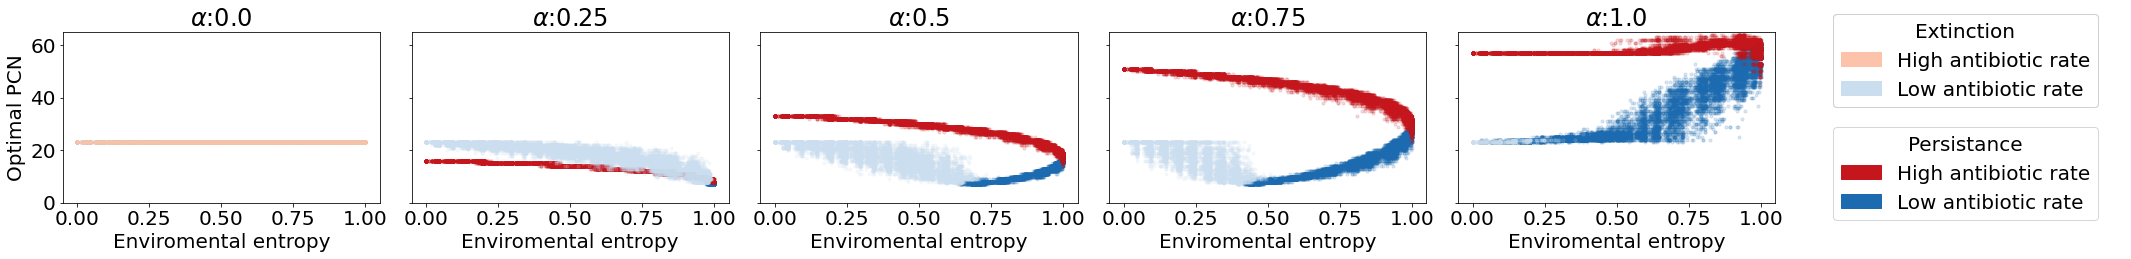

In [45]:
sub_alphas=[0,.25,.75]
sub_alphas=[0.,.25,.5,.75,.99,1]
sub_alphas=[0.,.25,.5,.75,1.]

fig,ax=plt.subplots(1,len(sub_alphas)+1,figsize=(6*len(sub_alphas),4),sharey=True,sharex=True)
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 20})

norm = matplotlib.colors.Normalize(vmin=-.05,vmax=1.05)
c_m = matplotlib.cm.Reds
c_mB = matplotlib.cm.Blues
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])
s_mB = matplotlib.cm.ScalarMappable(cmap=c_mB, norm=norm)
s_mB.set_array([])

coe_threshold=1e-7
for aii,a in enumerate(sub_alphas):
    ai=talphas.index(a)
    loss_colorR=s_m.to_rgba(.2)
    loss_colorB=s_mB.to_rgba(.2)
    coex_colorR=s_m.to_rgba(.8)
    coex_colorB=s_mB.to_rgba(.8)

    Hx=Hx_list[ai]
    opPCNs=opPCNs_list[ai]
    Fx=Fx_list[ai]
    opPCNs_lastP=[float(x) for x in opPCNs_lastP_list[ai]]

    Hflow_coex=[]
    Hfhigh_coex=[]
    Hflow_loss=[]
    Hfhigh_loss=[]
    opflow_coex=[]
    opfhigh_coex=[]
    opflow_loss=[]
    opfhigh_loss=[]

    for h,f,op,lastp in zip(Hx,Fx,opPCNs,opPCNs_lastP):
        if((f<=.5)&(lastp<coe_threshold)):
            Hflow_loss.append(h)
            opflow_loss.append(op)
        elif((f<=.5)&(lastp>coe_threshold)):
            Hflow_coex.append(h)
            opflow_coex.append(op)
        elif((f>.5)&(lastp<coe_threshold)):
            Hfhigh_loss.append(h)
            opfhigh_loss.append(op)
        else:
            Hfhigh_coex.append(h)
            opfhigh_coex.append(op)    

    
    ax[aii].scatter(Hflow_coex,opflow_coex,s=10,color=coex_colorB,alpha=.15, zorder=3)
    ax[aii].scatter(Hfhigh_coex,opfhigh_coex,s=10,color=coex_colorR,alpha=.15, zorder=3)#,label=round(a,2))
    coex_Hs=Hfhigh_coex+Hflow_coex
    coex_ops=opfhigh_coex+opflow_coex
    coex_points=MultiPoint([(x,y) for x,y in zip(coex_Hs,coex_ops)])
    coex_area=coex_points.convex_hull
    xl=1
    lmarker="2"
    loss_Hs=Hfhigh_loss+Hflow_loss
    loss_ops=opfhigh_loss+opflow_loss
    loss_points=MultiPoint([(x,y) for x,y in zip(loss_Hs,loss_ops)])
    loss_area=loss_points.convex_hull

    ax[aii].scatter(Hflow_loss,opflow_loss,s=10,color=loss_colorB,alpha=.15, zorder=3)
    ax[aii].scatter(Hfhigh_loss,opfhigh_loss,s=10,color=loss_colorR,alpha=.15, zorder=3)#,label=round(a,2))
    ax[aii].set_title(r"$\alpha$:%s"%a)
    ax[aii].set_xlabel("Enviromental entropy")
ax[0].set_ylabel("Optimal PCN")


red_patch = mpatches.Patch(color=coex_colorR)
blue_patch = mpatches.Patch(color=coex_colorB)
fake_handles=[red_patch,blue_patch]
fake_labels=["High antibiotic rate","Low antibiotic rate"]
#fake_labels=["High AR","Low AR"]
legend1=ax[-1].legend(fake_handles, fake_labels,title="Persistance",loc="upper center",bbox_to_anchor=(.5, .5))#,fontsize=12,title_fontsize=12)

red_patch = mpatches.Patch(color=loss_colorR)
blue_patch = mpatches.Patch(color=loss_colorB)
fake_handles=[red_patch,blue_patch]
fake_labels=["High antibiotic rate","Low antibiotic rate"]
#fake_labels=["High AR","Low AR"]
legend2=ax[-1].legend(fake_handles, fake_labels,title="Extinction",loc="lower center",bbox_to_anchor=(.5, .5))#,fontsize=12,title_fontsize=12)
plt.ylim([0,65])
ax[-1].axis('off')
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend1)

plt.tight_layout()
figname=figuresDir+"Fig-5_D.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-5_D.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


## E

/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


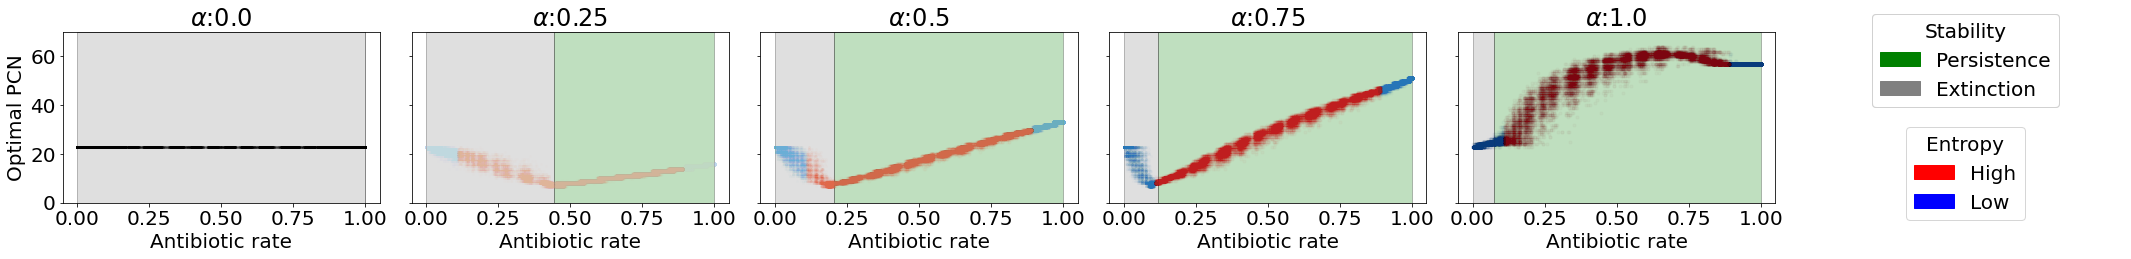

In [46]:
sub_alphas=[0,.25,.75]
sub_alphas=[0.,.25,.5,.75,.99,1]
sub_alphas=[0.,.25,.5,.75,1.]
ymax=70 
fig,ax=plt.subplots(1,len(sub_alphas)+1,figsize=(6*len(sub_alphas),4),sharey=True,sharex=True)
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 20})
norm = matplotlib.colors.Normalize(vmin=-.05,vmax=1.05)
c_m = matplotlib.cm.Reds
c_m0 = matplotlib.cm.Blues
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])
s_m0 = matplotlib.cm.ScalarMappable(cmap=c_m0, norm=norm)
s_m0.set_array([])

coe_threshold=1e-7
for aii,a in enumerate(sub_alphas):
    ai=talphas.index(a)
    this_color=s_m.to_rgba(a)
    this_color0=s_m0.to_rgba(a)
    if(a==0):
        this_color='k'
        this_color0='k'
    Hx=Hx_list[ai]
    opPCNs=opPCNs_list[ai]
    Fx=Fx_list[ai]
    opPCNs_lastP=[float(x) for x in opPCNs_lastP_list[ai]]

    Fflow_coex=[]
    Ffhigh_coex=[]
    Fflow_loss=[]
    Ffhigh_loss=[]
    opflow_coex=[]
    opfhigh_coex=[]
    opflow_loss=[]
    opfhigh_loss=[]

    for h,f,op,lastp in zip(Hx,Fx,opPCNs,opPCNs_lastP):
        if((h<=.5)&(lastp<coe_threshold)):
            Fflow_loss.append(f)
            opflow_loss.append(op)
        elif((h<=.5)&(lastp>coe_threshold)):
            Fflow_coex.append(f)
            opflow_coex.append(op)
        elif((h>.5)&(lastp<coe_threshold)):
            Ffhigh_loss.append(f)
            opfhigh_loss.append(op)
        else:
            Ffhigh_coex.append(f)
            opfhigh_coex.append(op)    

    scater_alpha=.025
    ax[aii].scatter(Fflow_coex,opflow_coex,s=10,color=this_color0,alpha=scater_alpha, zorder=3)
    ax[aii].scatter(Ffhigh_coex,opfhigh_coex,s=10,color=this_color,alpha=scater_alpha, zorder=3)#,label=round(a,2))
    coex_Fs=Ffhigh_coex+Fflow_coex
    coex_ops=opfhigh_coex+opflow_coex
    coex_points=MultiPoint([(x,y) for x,y in zip(coex_Fs,coex_ops)])
    coex_area=coex_points.convex_hull
    xl=0
    lmarker="2"
    loss_Fs=Ffhigh_loss+Fflow_loss
    loss_ops=opfhigh_loss+opflow_loss
    points_list=[(x,y) for x,y in zip(loss_Fs,loss_ops)]
    loss_points=MultiPoint(points_list)
    loss_area=loss_points.convex_hull
    if(loss_area.geom_type=='LineString'):
        loss_area=loss_area.buffer(3,cap_style=2)
    else:
        loss_area=loss_points.envelope
    st_lim=loss_area.exterior.coords.xy[0][1]
    ax[aii].scatter(Fflow_loss,opflow_loss,s=10,color=this_color0,alpha=scater_alpha,marker=lmarker, zorder=3)
    ax[aii].scatter(Ffhigh_loss,opfhigh_loss,s=10,color=this_color,alpha=scater_alpha,marker=lmarker, zorder=3)#,label=round(a,2))
    newp=Polygon([(0,0),(st_lim,0),(st_lim,ymax),(0,ymax)])
    ax[aii].add_patch(PolygonPatch(newp, fc="gray", ec='k', alpha=0.25, zorder=1 ))
    newp=Polygon([(st_lim,0),(1,0),(1,ymax),(st_lim,ymax)])
    ax[aii].add_patch(PolygonPatch(newp, fc="green", ec='k', alpha=0.25, zorder=1 ))
    ax[aii].set_title(r"$\alpha$:%s"%a)
    ax[aii].set_xlabel("Antibiotic rate")
ax[0].set_ylabel("Optimal PCN")


red_patch = mpatches.Patch(color='red')
blue_patch = mpatches.Patch(color='blue')
fake_handles=[red_patch,blue_patch]
fake_labels=["High","Low"]
legend1=ax[-1].legend(fake_handles, fake_labels,title="Entropy",loc="upper center",bbox_to_anchor=(.5, .5))#,fontsize=12,title_fontsize=12)

red_patch = mpatches.Patch(color='green')
blue_patch = mpatches.Patch(color='gray')
fake_handles=[red_patch,blue_patch]
fake_labels=["Persistence","Extinction"]
legend2=ax[-1].legend(fake_handles, fake_labels,title="Stability",loc="lower center",bbox_to_anchor=(.5, .5))#,fontsize=12,title_fontsize=12)
ax[-1].axis('off')

plt.gca().add_artist(legend2)
plt.gca().add_artist(legend1)

plt.ylim([0,ymax])

plt.tight_layout()
figname=figuresDir+"Fig-5_E.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=figuresDir+"Fig-5_E.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()


# Supplementary

In [47]:
supFigDir=figuresDir+"supplementary/"

## PCN vs Size

In [52]:
this_table=table_nature+"pcnSize_table.csv"

pcnvsSize_df=pd.read_csv(this_table,sep="\t")

pcnVsize_pcns=list(pcnvsSize_df["PCN Mean"])
pcnVsize_pcns_sd=list(pcnvsSize_df["PCN SD"])

pcnVsize_sizes=list(pcnvsSize_df["Size (Kb)"])


Pearson Correlation Coefficient: -0.876, p-val: 8.5127e-06
0.767918097373942
intercept: 2.4237203878167493
slope: [-0.77354604]
Saving fig:  /content/drive/MyDrive/SYNC_Projects/Plasmidia/ms/figures/supplementary/Fig-supp_PCNvsSize.png


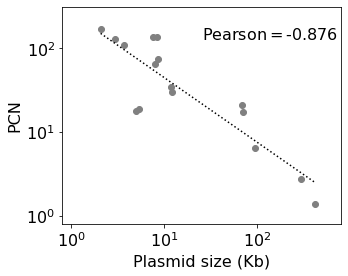

In [53]:
figPZ=plt.figure(figsize=(5,4))
plt.rcParams.update({'font.size': 16})
figPZ.set_facecolor('white')


pcnVsize_sizest=pcnVsize_sizes
pcnVsize_pcnst=pcnVsize_pcns

pcnVsize_sizest=[np.log10(x) for x in pcnVsize_sizes]
pcnVsize_pcnst=[np.log10(x) for x in pcnVsize_pcns]

xs0=pcnVsize_sizest.copy()
ys=pcnVsize_pcnst.copy()
xs=np.array(xs0).reshape((-1, 1))
model = LinearRegression().fit(xs, ys)
r_sq = model.score(xs, ys)
rscore=model.coef_[0]

plt.scatter(xs0,ys,c="gray")


pres=pearsonr(pcnVsize_sizest,pcnVsize_pcnst)
print("Pearson Correlation Coefficient: %s, p-val: %s"%(round(pres[0],3),round(pres[1],10)))

plt.xlim([-.1,2.9])
sizes_ticks=[0,1,2]
sizes_ticks_text=[r"$10^{%s}$"%x for x in sizes_ticks]
plt.xticks(sizes_ticks,sizes_ticks_text)
plt.xlabel("Plasmid size (Kb)")

plt.ylim([-.1,2.5])
pcn_ticks=[0,1,2]
pcn_ticks_text=[r"$10^{%s}$"%x for x in pcn_ticks]
plt.yticks(pcn_ticks,pcn_ticks_text)
plt.ylabel("PCN")


xs0.sort()

plt.annotate(r"Pearson$=$%s"%(round(pres[0],3)),xy=(.5,.85),xycoords="axes fraction")#,bbox=dict(boxstyle="round",fc="white",  ec="gray", lw=2))

plt.plot(xs0, model.coef_*xs0+ model.intercept_, ':k')
print(r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


figname=supFigDir+"Fig-supp_PCNvsSize.png"
print("Saving fig: ",figname)
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=supFigDir+"Fig-supp_PCNvsSize.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()


## Entropy

In [ ]:
ndays=1000
max_tries=1000
numEs=1000

numBins=20  #Number of bins

file_envsH=randomEnvs+"Random_envs_Binomial_BinsH_T-%s.npy"%ndays
file_envs_simple=randomEnvs+"Random_envs_Binomial_T-%s.json"%ndays
file_envs_simplex=randomEnvs+"Random_envs_Binomialx_T-%s.json"%ndays
file_envsF=randomEnvs+"Random_envs_Binomial_BinsF_T-%s.npy"%ndays


print("Loading saved environments")
Es_BinsH=np.load(file_envsH,allow_pickle=True)
Es_BinsF=np.load(file_envsF,allow_pickle=True)
Es=jsonLoadEs(file_envs_simple)
Es_purged=jsonLoadEs(file_envs_simplex)
print("done!")



Loading saved environments
done!


28112 28112


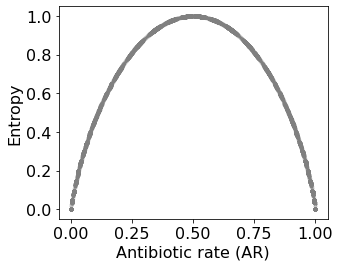

In [54]:
fig,ax=plt.subplots(figsize=(5,4))
plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')
Hx_list=[]
Fx_list=[]

for ib,thisE in enumerate(Es_purged):
    
    thisE_T=thisE['Ev']
    this_H=thisE['shannon']
    this_F=thisE['frac_1']
    Hx_list.append(this_H)
    Fx_list.append(this_F)
        
print(len(Fx_list),len(Hx_list))

ax.scatter(Fx_list,Hx_list,s=10,alpha=.01,color='gray')

ax.set_xlabel("Antibiotic rate (AR)")
ax.set_ylabel("Entropy")
#ax.set_title("All")


plt.tight_layout()
figname=supFigDir+"Fig-supp_HvsAR.png"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)
figname=supFigDir+"Fig-supp_HvsAR.pdf"
plt.savefig(figname,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()